# E-retail factors for customer activation and retention: A case study from Indian e-commerce customers

Customer satisfaction has emerged as one of the most important factors that guarantee the success of online store; it has been posited as a key stimulant of purchase, repurchase intentions and customer loyalty. A comprehensive review of the literature, theories and models have been carried out to propose the models for customer activation and customer retention. Five major factors that contributed to the success of an e-commerce store have been identified as: service quality, system quality, information quality, trust and net benefit. The research furthermore investigated the factors that influence the online customers repeat purchase intention. The combination of both utilitarian value and hedonistic values are needed to affect the repeat purchase intention (loyalty) positively. The data is collected from the Indian online shoppers. Results indicate the e-retail success factors, which are very much critical for customer satisfaction.


# 1. Import Liabrary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# 2.Data Collection

In [2]:
df=pd.read_excel("customer_retention_dataset.xlsx")
df_code=pd.read_excel("customer_retention_dataset_code.xlsx")

In [3]:
df.head()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"


# 3. Data Processing

# 3.1 Data Size

In [4]:
df.shape,df_code.shape

((269, 71), (269, 71))

**As we can see there are 269 rows and 71 columns in dataset.**

## 3.2 Data Type

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                                                                                                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                          --------------  ----- 
 0   1Gender of respondent                                                                                                                                                                                           269 non-null    object
 1   2 How old are you?                                                                                                                                                                    

**We can see there are 1 column which data type is int and 70 columns data type is object.**

## 3.3 Removing extra spaces from columns name

In [6]:
df.columns=df.columns.str.strip(" ")
df_code.columns=df_code.columns.str.strip(" ")

In [7]:
df.columns

Index(['1Gender of respondent', '2 How old are you?',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t',
       '10 What is the operating system (OS) of your device?\t\t\t\t',
       '11 What browser do you run on your device to access the website?\t\t\t',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?',
       '13 After first visit, how do you reach the online retail store?\t\t\t\t',
       '14 How much time do you explore the e- retail store before making a purchase decision?',
       '15 What is your preferred payment Option?\t\t\t\t\t',
 

## 3.4 Changing Columns name for our easy analysis.

In [8]:
df.rename(columns={'1Gender of respondent':'Gender', 
                   '2 How old are you?':'Age',
       '3 Which city do you shop online from?':'City',
       '4 What is the Pin Code of where you shop online from?':'Pincode',
       '5 Since How Long You are Shopping Online ?':'Years shopping Online',
       '6 How many times you have made an online purchase in the past 1 year?':'Frequency purchased (in 1 yr)',
       '7 How do you access the internet while shopping on-line?':'Internet type',
       '8 Which device do you use to access the online shopping?':'Device type',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t':'Size screen',
       '10 What is the operating system (OS) of your device?\t\t\t\t':'OS',
       '11 What browser do you run on your device to access the website?\t\t\t':"Browser",
       '12 Which channel did you follow to arrive at your favorite online store for the first time?':'Channel used',
       '13 After first visit, how do you reach the online retail store?\t\t\t\t':'Later Channed used',
       '14 How much time do you explore the e- retail store before making a purchase decision?':'Browse time',
       '15 What is your preferred payment Option?\t\t\t\t\t':'Preferred payment type',
       '16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t':'Frequency abandon',
       '17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t':'Reason abandon',
       '18 The content on the website must be easy to read and understand':'Content understandable',
       '19 Information on similar product to the one highlighted  is important for product comparison':'Product Information highlight',
       '20 Complete information on listed seller and product being offered is important for purchase decision.':'Seller & product information',
       '21 All relevant information on listed products must be stated clearly':'Listed product information',
       '22 Ease of navigation in website':'Ease navigation', '23 Loading and processing speed':'Website loading speed',
       '24 User friendly Interface of the website':'User friendly',
       '25 Convenient Payment methods':'payment method convenient',
       '26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time':'Transaction time',
       '27 Empathy (readiness to assist with queries) towards the customers':'Customer query',
       '28 Being able to guarantee the privacy of the customer':'Privacy data',
       '29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)':'Seller Response channel',
       '30 Online shopping gives monetary benefit and discounts':'Monetary benifit and discount',
       '31 Enjoyment is derived from shopping online':'Enjoyment',
       '32 Shopping online is convenient and flexible':'Convenient and flexible',
       '33 Return and replacement policy of the e-tailer is important for purchase decision':'Return and replacement policy',
       '34 Gaining access to loyalty programs is a benefit of shopping online':'loyalty programs',
       '35 Displaying quality Information on the website improves satisfaction of customers':'quality information',
       '36 User derive satisfaction while shopping on a good quality website or application':'User satisfaction',
       '37 Net Benefit derived from shopping online can lead to users satisfaction':'Net benefit',
       '38 User satisfaction cannot exist without trust':'Trust user satisfaction',
       '39 Offering a wide variety of listed product in several category':'Product assortment',
       '40 Provision of complete and relevant product information':'Provision product info',
       '41 Monetary savings':'Discount',
       '42 The Convenience of patronizing the online retailer':'Convenience',
       '43 Shopping on the website gives you the sense of adventure':'Adventure experiance',
       '44 Shopping on your preferred e-tailer enhances your social status':'Social status',
       '45 You feel gratification shopping on your favorite e-tailer':'gratification',
       '46 Shopping on the website helps you fulfill certain roles':'roles',
       '47 Getting value for money spent':'Value for money',
       'From the following, tick any (or all) of the online retailers you have shopped from;':'Online retailer shopped',
       'Easy to use website or application':'Easy use website',
       'Visual appealing web-page layout':'Visual appealing', 'Wild variety of product on offer':'Wide variety',
       'Complete, relevant description information of products':'Product Information',
       'Fast loading website speed of website and application':'Loading speed',
       'Reliability of the website or application':'Reliability',
       'Quickness to complete purchase':'Qucikness complete purchase',
       'Availability of several payment options':'Option Payment method', 'Speedy order delivery':'Delivery time',
       'Privacy of customers’ information':'Privacy information',
       'Security of customer financial information':'Security transaction',
       'Perceived Trustworthiness':'Perceived trust',
       'Presence of online assistance through multi-channel':'Presence online',
       'Longer time to get logged in (promotion, sales period)':'logged in time',
       'Longer time in displaying graphics and photos (promotion, sales period)':'graphis diaplay time',
       'Late declaration of price (promotion, sales period)':'Late declaration price',
       'Longer page loading time (promotion, sales period)':'Landing page time',
       'Limited mode of payment on most products (promotion, sales period)':'Limited mode of payment',
       'Longer delivery period':'Delivery period', 'Change in website/Application design':'Website renovation',
       'Frequent disruption when moving from one page to another':'Disruption',
       'Website is as efficient as before':'After renovation experiance',
       'Which of the Indian online retailer would you recommend to a friend?':'Recommend online retailer'},inplace=True)

**We can see the column name is very lengthy so we will make it short to make the analyis convenience.**

In [9]:
df.columns

Index(['Gender', 'Age', 'City', 'Pincode', 'Years shopping Online',
       'Frequency purchased (in 1 yr)', 'Internet type', 'Device type',
       'Size screen', 'OS', 'Browser', 'Channel used', 'Later Channed used',
       'Browse time', 'Preferred payment type', 'Frequency abandon',
       'Reason abandon', 'Content understandable',
       'Product Information highlight', 'Seller & product information',
       'Listed product information', 'Ease navigation',
       'Website loading speed', 'User friendly', 'payment method convenient',
       'Transaction time', 'Customer query', 'Privacy data',
       'Seller Response channel', 'Monetary benifit and discount', 'Enjoyment',
       'Convenient and flexible', 'Return and replacement policy',
       'loyalty programs', 'quality information', 'User satisfaction',
       'Net benefit', 'Trust user satisfaction', 'Product assortment',
       'Provision product info', 'Discount', 'Convenience',
       'Adventure experiance', 'Social status',

## 3.5 Choosing Relevent columns for our data analysis.

In [10]:
cols=["Gender","Age","City","Frequency purchased (in 1 yr)","OS","Later Channed used","Browse time","Preferred payment type","Reason abandon","Seller & product information","User friendly","Transaction time","Customer query","Privacy data","Monetary benifit and discount","Enjoyment","Return and replacement policy","loyalty programs","User satisfaction","Net benefit","Product assortment","Discount","Convenience","Adventure experiance","Social status","gratification","roles","Value for money",
      "Easy use website","Wide variety","Product Information","Loading speed","Reliability","Qucikness complete purchase","Option Payment method","Online retailer shopped",
      "Visual appealing","Delivery time","Privacy information","Presence online","Security transaction","Perceived trust","logged in time","graphis diaplay time","Late declaration price","Landing page time","Limited mode of payment","Delivery period","Website renovation","Disruption","After renovation experiance","Recommend online retailer"]

In [11]:
cols

['Gender',
 'Age',
 'City',
 'Frequency purchased (in 1 yr)',
 'OS',
 'Later Channed used',
 'Browse time',
 'Preferred payment type',
 'Reason abandon',
 'Seller & product information',
 'User friendly',
 'Transaction time',
 'Customer query',
 'Privacy data',
 'Monetary benifit and discount',
 'Enjoyment',
 'Return and replacement policy',
 'loyalty programs',
 'User satisfaction',
 'Net benefit',
 'Product assortment',
 'Discount',
 'Convenience',
 'Adventure experiance',
 'Social status',
 'gratification',
 'roles',
 'Value for money',
 'Easy use website',
 'Wide variety',
 'Product Information',
 'Loading speed',
 'Reliability',
 'Qucikness complete purchase',
 'Option Payment method',
 'Online retailer shopped',
 'Visual appealing',
 'Delivery time',
 'Privacy information',
 'Presence online',
 'Security transaction',
 'Perceived trust',
 'logged in time',
 'graphis diaplay time',
 'Late declaration price',
 'Landing page time',
 'Limited mode of payment',
 'Delivery period',
 'W

## 3.6 Handling missing value

In [12]:
df.isnull().sum().sum()

0

**As we can see there is no null value in dataset.**

# 4 Data Analysis

## 4.1 Descriptive Statistical Analysis

In [13]:
cols

['Gender',
 'Age',
 'City',
 'Frequency purchased (in 1 yr)',
 'OS',
 'Later Channed used',
 'Browse time',
 'Preferred payment type',
 'Reason abandon',
 'Seller & product information',
 'User friendly',
 'Transaction time',
 'Customer query',
 'Privacy data',
 'Monetary benifit and discount',
 'Enjoyment',
 'Return and replacement policy',
 'loyalty programs',
 'User satisfaction',
 'Net benefit',
 'Product assortment',
 'Discount',
 'Convenience',
 'Adventure experiance',
 'Social status',
 'gratification',
 'roles',
 'Value for money',
 'Easy use website',
 'Wide variety',
 'Product Information',
 'Loading speed',
 'Reliability',
 'Qucikness complete purchase',
 'Option Payment method',
 'Online retailer shopped',
 'Visual appealing',
 'Delivery time',
 'Privacy information',
 'Presence online',
 'Security transaction',
 'Perceived trust',
 'logged in time',
 'graphis diaplay time',
 'Late declaration price',
 'Landing page time',
 'Limited mode of payment',
 'Delivery period',
 'W

In [14]:
data=df[cols]

### 4.1.1 Checking Null value

In [15]:
data.isnull().sum()

Gender                           0
Age                              0
City                             0
Frequency purchased (in 1 yr)    0
OS                               0
Later Channed used               0
Browse time                      0
Preferred payment type           0
Reason abandon                   0
Seller & product information     0
User friendly                    0
Transaction time                 0
Customer query                   0
Privacy data                     0
Monetary benifit and discount    0
Enjoyment                        0
Return and replacement policy    0
loyalty programs                 0
User satisfaction                0
Net benefit                      0
Product assortment               0
Discount                         0
Convenience                      0
Adventure experiance             0
Social status                    0
gratification                    0
roles                            0
Value for money                  0
Easy use website    

**There is no null value.**

## 4.1.2 Finding data set data type.

In [16]:
numeric_feat=[]
categorical_feat=[]
num=["int64","float64"]
cat=["O"]
for column in data.columns:
    if data[column].dtypes in num:
        numeric_feat.append(column)
    if data[column].dtypes in cat:
        categorical_feat.append(column)

In [17]:
numeric_feat

[]

In [18]:
categorical_feat

['Gender',
 'Age',
 'City',
 'Frequency purchased (in 1 yr)',
 'OS',
 'Later Channed used',
 'Browse time',
 'Preferred payment type',
 'Reason abandon',
 'Seller & product information',
 'User friendly',
 'Transaction time',
 'Customer query',
 'Privacy data',
 'Monetary benifit and discount',
 'Enjoyment',
 'Return and replacement policy',
 'loyalty programs',
 'User satisfaction',
 'Net benefit',
 'Product assortment',
 'Discount',
 'Convenience',
 'Adventure experiance',
 'Social status',
 'gratification',
 'roles',
 'Value for money',
 'Easy use website',
 'Wide variety',
 'Product Information',
 'Loading speed',
 'Reliability',
 'Qucikness complete purchase',
 'Option Payment method',
 'Online retailer shopped',
 'Visual appealing',
 'Delivery time',
 'Privacy information',
 'Presence online',
 'Security transaction',
 'Perceived trust',
 'logged in time',
 'graphis diaplay time',
 'Late declaration price',
 'Landing page time',
 'Limited mode of payment',
 'Delivery period',
 'W

**As we can see there are all categorical datatype.**

## 4.2 Statistics of Categorical features

In [19]:
data.describe()

,Gender,Age,City,Frequency purchased (in 1 yr),OS,Later Channed used,Browse time,Preferred payment type,Reason abandon,Seller & product information,...,logged in time,graphis diaplay time,Late declaration price,Landing page time,Limited mode of payment,Delivery period,Website renovation,Disruption,After renovation experiance,Recommend online retailer
count,269,269,269,269,269,269,269,269,269,269,...,269,269,269,269,269,269,269,269,269,269
unique,2,5,11,6,3,5,5,3,5,5,...,10,10,8,11,8,6,7,8,8,8
top,Female,31-40 years,Delhi,Less than 10 times,Window/windows Mobile,Search Engine,more than 15 mins,Credit/Debit cards,Better alternative offer,Agree (4),...,Amazon.in,"Amazon.in, Flipkart.com",Myntra.com,Myntra.com,Snapdeal.com,Paytm.com,Amazon.in,Amazon.in,Amazon.in,Amazon.in
freq,181,81,58,114,122,87,123,148,133,101,...,57,60,75,61,87,72,96,53,94,79


**Observation**
- On above table we can interpret the statistics analysis for all feature.
- We can see the count, unique and top and fequency of all categorical variable.
- We will do deep dive in each requried feature.

# 5. Descriptive Analysis

### What is the sex of customer who does maximum shopping online?

In [20]:
print("\n********Count of Gender***********")
print(data["Gender"].value_counts())
print("\n*******% of Gender*************")
print(data["Gender"].value_counts(normalize=True))


********Count of Gender***********
Female    181
Male       88
Name: Gender, dtype: int64

*******% of Gender*************
Female    0.672862
Male      0.327138
Name: Gender, dtype: float64


### Univariate Analysis for Categorical Data

Fig-1



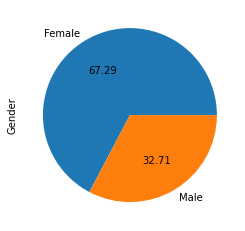

In [21]:
print("Fig-1")
print("")
data["Gender"].value_counts().plot(kind="pie",autopct="%.2f")
plt.show()

**Observation**
- As we have seen that Female customer are more (67.3%) who shopping online.
- It indicate that company should target female customer more than Male.

### Which Age group customer use most for online shopping?

In [22]:
print("\n********Count of Age***********")
print(data["Age"].value_counts())
print("\n*******% of Age*************")
print(data["Age"].value_counts(normalize=True))


********Count of Age***********
31-40 years           81
21-30 years           79
41-50 yaers           70
Less than 20 years    20
51 years and above    19
Name: Age, dtype: int64

*******% of Age*************
31-40 years           0.301115
21-30 years           0.293680
41-50 yaers           0.260223
Less than 20 years    0.074349
51 years and above    0.070632
Name: Age, dtype: float64


### Univariate Analysis for Categorical Data

Fig 2


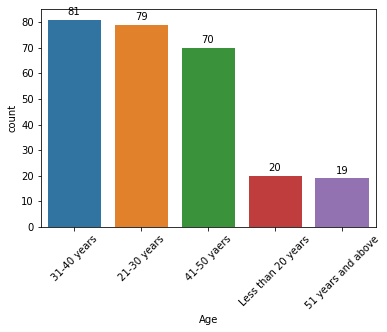

In [23]:
print("Fig 2")
s=sns.countplot(data["Age"])
for p in s.patches:
    s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")
s.set_xticklabels(s.get_xticklabels(),rotation=45);

**Observation**
- We can interpret that Age group from 21 year to 40 years of customer doing more online shopping.
- Below 20 years and Above 51 years age customers are very few and negligible.

### From Which City Customer using online purchase?

In [24]:
print("\n********Count of City***********")
print(data["City"].value_counts())
print("\n*******% of City*************")
print(data["City"].value_counts(normalize=True))


********Count of City***********
Delhi            58
Greater Noida    43
Noida            40
Bangalore        37
Karnal           27
Solan            18
Ghaziabad        18
Gurgaon          12
Merrut            9
Moradabad         5
Bulandshahr       2
Name: City, dtype: int64

*******% of City*************
Delhi            0.215613
Greater Noida    0.159851
Noida            0.148699
Bangalore        0.137546
Karnal           0.100372
Solan            0.066914
Ghaziabad        0.066914
Gurgaon          0.044610
Merrut           0.033457
Moradabad        0.018587
Bulandshahr      0.007435
Name: City, dtype: float64


### Univariate Analysis for Categorical Data

Fig 3


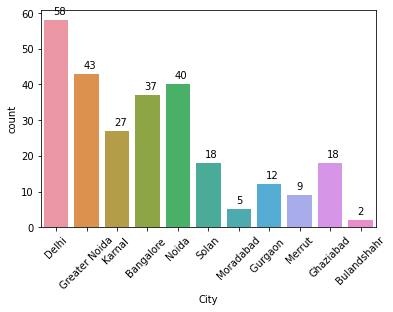

In [25]:
print("Fig 3")
s=sns.countplot(data["City"])
for p in s.patches:
    s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")
s.set_xticklabels(s.get_xticklabels(),rotation=45);

**Observation**
- Here we can see that maximum online shopper are from Delhi region followed by Noida and Bangalore.

### How frequently Customer purchased online in a year?

In [26]:
print("\n********Count of Frequency purchased***********")
print(data["Frequency purchased (in 1 yr)"].value_counts())
print("\n*******% of Frequency purchased (in 1 yr)*************")
print(data["Frequency purchased (in 1 yr)"].value_counts(normalize=True))


********Count of Frequency purchased***********
Less than 10 times    114
31-40 times            63
41 times and above     47
11-20 times            29
21-30 times            10
42 times and above      6
Name: Frequency purchased (in 1 yr), dtype: int64

*******% of Frequency purchased (in 1 yr)*************
Less than 10 times    0.423792
31-40 times           0.234201
41 times and above    0.174721
11-20 times           0.107807
21-30 times           0.037175
42 times and above    0.022305
Name: Frequency purchased (in 1 yr), dtype: float64


### Univariate Analysis for Categorical Data

Fig 4


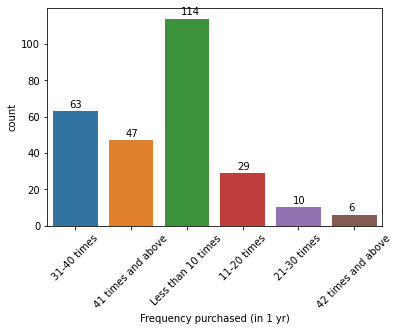

In [27]:
print("Fig 4")
s=sns.countplot(data["Frequency purchased (in 1 yr)"])
for p in s.patches:
    s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")
s.set_xticklabels(s.get_xticklabels(),rotation=45);

**Observation**
- Around 42% of customer doing shopping in a year less than 10 times.
- Around 23% of cusomer doing shopping in a year 31-40 times in a year.

### Which Operatting System Customer uses for online shopping?

In [28]:
print("\n********Count of Operating System use***********")
print(data["OS"].value_counts())
print("\n*******% of Operating System use*************")
print(data["OS"].value_counts(normalize=True))


********Count of Operating System use***********
Window/windows Mobile    122
Android                   85
IOS/Mac                   62
Name: OS, dtype: int64

*******% of Operating System use*************
Window/windows Mobile    0.453532
Android                  0.315985
IOS/Mac                  0.230483
Name: OS, dtype: float64


### Univariate Analysis for Categorical Data

Fig 5


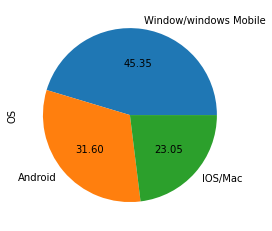

In [29]:
print("Fig 5")
data["OS"].value_counts().plot(kind="pie",autopct="%.2f")
plt.show()

**Observation**
- Around 45 % of user using window/windons mobile for online shopping.
- Around 31.6% of user using Android mobile for online shopping.
- Around 23% of user using IOS/Mac for onine shopping

### Which Channel Type Customer use for using online shopping?

In [30]:
print("\n********Count of Channel used***********")
print(data["Later Channed used"].value_counts())
print("\n*******% of Channel used*************")
print(data["Later Channed used"].value_counts(normalize=True))


********Count of Channel used***********
Search Engine      87
Via application    86
Direct URL         70
E-mail             18
Social Media        8
Name: Later Channed used, dtype: int64

*******% of Channel used*************
Search Engine      0.323420
Via application    0.319703
Direct URL         0.260223
E-mail             0.066914
Social Media       0.029740
Name: Later Channed used, dtype: float64


### Univariate Analysis for Categorical Data

Fig 6


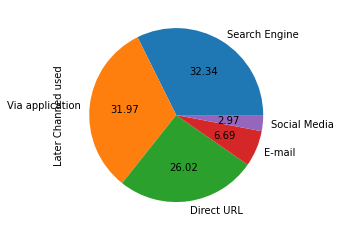

In [31]:
print("Fig 6")
data["Later Channed used"].value_counts().plot(kind="pie",autopct="%.2f")
plt.show()

**Observation**
- Around 32% of user reaching website via Search Engine for next purchased.
- Around 32% of user reaching through installed app in mobile for next purchased.
- Very less % of user reaching through email or socail media link.
- Direct URL is more impact than E-Mail and Social Media

### How much Time Customer spend for shopping online?

In [32]:
print("\n********Count of Browse Time***********")
print(data["Browse time"].value_counts())
print("\n*******% of Browse Time*************")
print(data["Browse time"].value_counts(normalize=True))


********Count of Browse Time***********
more than 15 mins    123
6-10 mins             71
11-15 mins            46
Less than 1 min       15
1-5 mins              14
Name: Browse time, dtype: int64

*******% of Browse Time*************
more than 15 mins    0.457249
6-10 mins            0.263941
11-15 mins           0.171004
Less than 1 min      0.055762
1-5 mins             0.052045
Name: Browse time, dtype: float64


### Univariate Analysis for Categorical Data

Fig 7


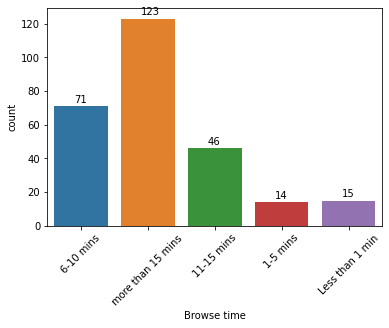

In [33]:
print("Fig 7")
s=sns.countplot(data["Browse time"])
for p in s.patches:
    s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")
s.set_xticklabels(s.get_xticklabels(),rotation=45);

**Observation**
- Around 46% of user spend more than 15 mins for online shopping.
- Only 5% of user spend less than 1 min and till 5 min for online shopping.

### What is the Preferred Payment Type of Customer?

In [34]:
print("\n********Count of Payment Type***********")
print(data["Preferred payment type"].value_counts())
print("\n*******% of Payment Type*************")
print(data["Preferred payment type"].value_counts(normalize=True))


********Count of Payment Type***********
Credit/Debit cards                    148
Cash on delivery (CoD)                 76
E-wallets (Paytm, Freecharge etc.)     45
Name: Preferred payment type, dtype: int64

*******% of Payment Type*************
Credit/Debit cards                    0.550186
Cash on delivery (CoD)                0.282528
E-wallets (Paytm, Freecharge etc.)    0.167286
Name: Preferred payment type, dtype: float64


### Univariate Analysis 

Fig 8


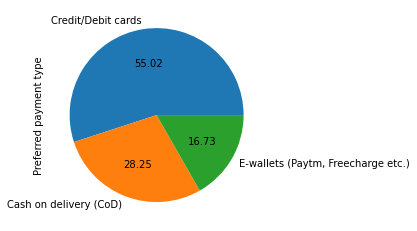

In [35]:
print("Fig 8")
data["Preferred payment type"].value_counts().plot(kind="pie",autopct="%.2f")
plt.show()

**Observation**
- Almost 55% of customer preferred to pay by using credit/debit cards as payment mode for online shopping
- Only 16% of customer preferred to pay by using E-walled as payment mode for online shopping.

### What is the top most reason of Abandon Cart?

In [36]:
print("\n********Count of Abandon Reason***********")
print(data["Reason abandon"].value_counts())
print("\n*******% of Reason for Abandon*************")
print(data["Reason abandon"].value_counts(normalize=True))


********Count of Abandon Reason***********
Better alternative offer        133
Promo code not applicable        54
Change in price                  37
Lack of trust                    31
No preferred mode of payment     14
Name: Reason abandon, dtype: int64

*******% of Reason for Abandon*************
Better alternative offer        0.494424
Promo code not applicable       0.200743
Change in price                 0.137546
Lack of trust                   0.115242
No preferred mode of payment    0.052045
Name: Reason abandon, dtype: float64


Fig 9


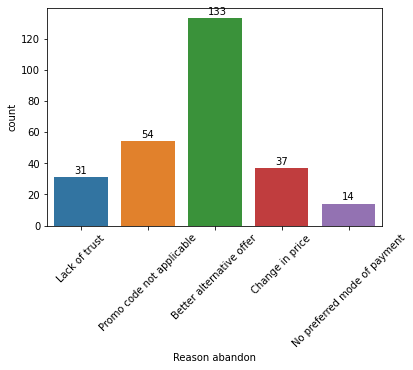

In [37]:
print("Fig 9")
s=sns.countplot(data["Reason abandon"])
for p in s.patches:
    s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")
s.set_xticklabels(s.get_xticklabels(),rotation=45);

**Observation**
- Around 49% of user Abandon the cart due to better alternative offer.
- Also around 20% of user abandon the cart due to promo code not applicable

### How Customer feel important about Seller & Product Information while doing online shopping?

In [38]:
print("\n********Count of Seller & Product Information***********")
print(data["Seller & product information"].value_counts())
print("\n*******% of Seller & Product Information*************")
print(data["Seller & product information"].value_counts(normalize=True))


********Count of Seller & Product Information***********
Agree (4)                101
Strongly agree (5)        87
Indifferent (3)           52
Dis-agree (2)             18
Strongly disagree (1)     11
Name: Seller & product information, dtype: int64

*******% of Seller & Product Information*************
Agree (4)                0.375465
Strongly agree (5)       0.323420
Indifferent (3)          0.193309
Dis-agree (2)            0.066914
Strongly disagree (1)    0.040892
Name: Seller & product information, dtype: float64


### Univariate Analysis

Fig 10


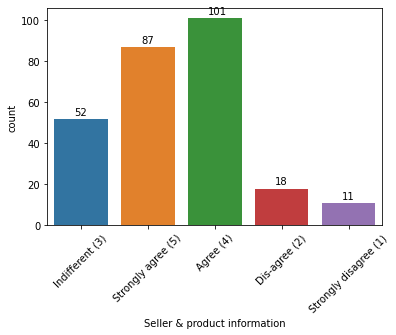

In [39]:
print("Fig 10")
s=sns.countplot(data["Seller & product information"])
for p in s.patches:
    s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")
s.set_xticklabels(s.get_xticklabels(),rotation=45);

**Observation**
- Around 37.5% of user feel that Seller and product information is very helpful for shopping.

### How much important of User Friendly website/app?

In [40]:
print("\n********Count of User Friendly***********")
print(data["User friendly"].value_counts())
print("\n*******% of User Friendly*************")
print(data["User friendly"].value_counts(normalize=True))


********Count of User Friendly***********
Strongly agree (5)       189
Agree (4)                 45
Strongly disagree (1)     18
Dis-agree (2)             12
Indifferent (3)            5
Name: User friendly, dtype: int64

*******% of User Friendly*************
Strongly agree (5)       0.702602
Agree (4)                0.167286
Strongly disagree (1)    0.066914
Dis-agree (2)            0.044610
Indifferent (3)          0.018587
Name: User friendly, dtype: float64


### Univariate Analysis

Fig 11


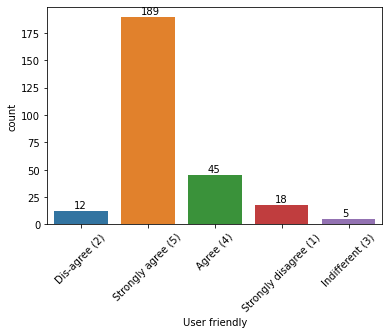

In [41]:
print("Fig 11")
s=sns.countplot(data["User friendly"])
for p in s.patches:
    s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")
s.set_xticklabels(s.get_xticklabels(),rotation=45);

**Observation**

-Around 70% of user feel that the website must be user Friendly.

### Is Transaction time is important factor while doing online shopping?

In [42]:
print("\n********Count of Transaction time***********")
print(data["Transaction time"].value_counts())
print("\n*******% of Transaction time*************")
print(data["Transaction time"].value_counts(normalize=True))


********Count of Transaction time***********
Strongly agree (5)    141
Agree (4)              86
Disagree (2)           30
indifferent  (3)       12
Name: Transaction time, dtype: int64

*******% of Transaction time*************
Strongly agree (5)    0.524164
Agree (4)             0.319703
Disagree (2)          0.111524
indifferent  (3)      0.044610
Name: Transaction time, dtype: float64


### Univariate Analysis

Fig 12


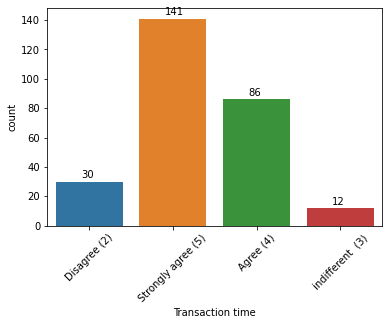

In [43]:
print("Fig 12")
s=sns.countplot(data["Transaction time"])
for p in s.patches:
    s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")
s.set_xticklabels(s.get_xticklabels(),rotation=45);

**Observation**
- 52% of user believe or expect that the transaction for payment would be completed on stipulated time.

### Is Customer query is important factor while doing purchase e-retailer?

In [44]:
print("\n********Count of Customer query***********")
print(data["Customer query"].value_counts())
print("\n*******% of Customer query*************")
print(data["Customer query"].value_counts(normalize=True))


********Count of Customer query***********
Strongly agree (5)       194
Agree (4)                 42
Strongly disagree (1)     18
indifferent (3)           15
Name: Customer query, dtype: int64

*******% of Customer query*************
Strongly agree (5)       0.721190
Agree (4)                0.156134
Strongly disagree (1)    0.066914
indifferent (3)          0.055762
Name: Customer query, dtype: float64


**Observation**
- Almost 72% of user they feel or expect that Customer query should be handled in well manner by online retailer. 

### Univariate Analysis

Fig 13


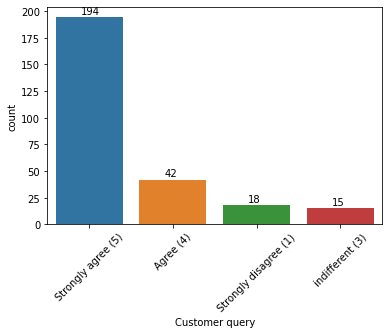

In [45]:
print("Fig 13")
s=sns.countplot(data["Customer query"])
for p in s.patches:
    s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")
s.set_xticklabels(s.get_xticklabels(),rotation=45);

### Is Privacy of Customer Data is important factor for online shopper?

In [46]:
print("\n********Count of Privacy data***********")
print(data["Privacy data"].value_counts())
print("\n*******% of Privacy data*************")
print(data["Privacy data"].value_counts(normalize=True))


********Count of Privacy data***********
Strongly agree (5)    185
Agree (4)              58
indifferent (3)        26
Name: Privacy data, dtype: int64

*******% of Privacy data*************
Strongly agree (5)    0.687732
Agree (4)             0.215613
indifferent (3)       0.096654
Name: Privacy data, dtype: float64


### Univariate Analysis

Fig 14


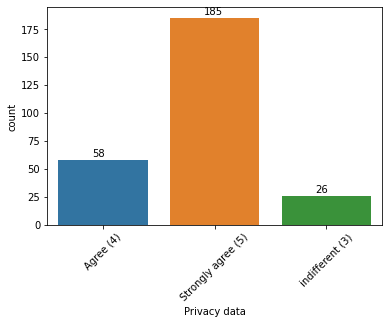

In [47]:
print("Fig 14")
s=sns.countplot(data["Privacy data"])
for p in s.patches:
    s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")
s.set_xticklabels(s.get_xticklabels(),rotation=45);

**Observation**
- 69% of user believe that Data privacy is important factor for them.

### Is Monetary benifit and discount important for Customer while purchasing online?

In [48]:
print("\n********Count of Monetary benifit and discount***********")
print(data["Monetary benifit and discount"].value_counts())
print("\n*******% of Monetary benifit and discount*************")
print(data["Monetary benifit and discount"].value_counts(normalize=True))


********Count of Monetary benifit and discount***********
Strongly agree (5)       105
Agree (4)                 85
indifferent (3)           50
Strongly disagree (1)     18
Dis-agree (2)             11
Name: Monetary benifit and discount, dtype: int64

*******% of Monetary benifit and discount*************
Strongly agree (5)       0.390335
Agree (4)                0.315985
indifferent (3)          0.185874
Strongly disagree (1)    0.066914
Dis-agree (2)            0.040892
Name: Monetary benifit and discount, dtype: float64


### Univariate Analysis

Fig 15


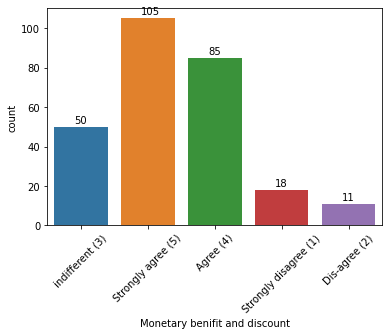

In [49]:
print("Fig 15")
s=sns.countplot(data["Monetary benifit and discount"])
for p in s.patches:
    s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")
s.set_xticklabels(s.get_xticklabels(),rotation=45);

**Observation**
- 39% of user believe that online retailer provide more monetary benifit and discount.

### Is  Return and replacement policy important for Customer?

In [50]:
print("\n********Count of Return and replacement policy***********")
print(data["Return and replacement policy"].value_counts())
print("\n*******% of Return and replacement policy*************")
print(data["Return and replacement policy"].value_counts(normalize=True))


********Count of Return and replacement policy***********
Strongly agree (5)    198
Agree (4)              51
Dis-agree (2)          20
Name: Return and replacement policy, dtype: int64

*******% of Return and replacement policy*************
Strongly agree (5)    0.736059
Agree (4)             0.189591
Dis-agree (2)         0.074349
Name: Return and replacement policy, dtype: float64


### Univariate Analysis

Fig 16


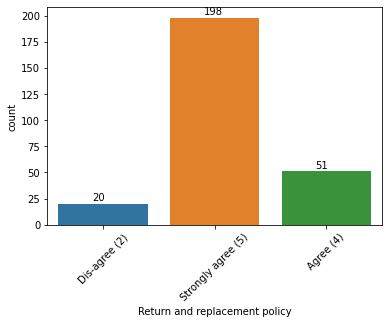

In [51]:
print("Fig 16")
s=sns.countplot(data["Return and replacement policy"])
for p in s.patches:
    s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")
s.set_xticklabels(s.get_xticklabels(),rotation=45);

**Observation**
- 74% of user believe that Return and replacement policy is important factor to make purchase decision.

### Is Loyalty programs is benefical for online shopper?

In [52]:
print("\n********Count of loyalty programs***********")
print(data["loyalty programs"].value_counts())
print("\n*******% of loyalty programs*************")
print(data["loyalty programs"].value_counts(normalize=True))


********Count of loyalty programs***********
Strongly agree (5)       115
Agree (4)                 64
indifferent (3)           64
Dis-agree (2)             15
Strongly disagree (1)     11
Name: loyalty programs, dtype: int64

*******% of loyalty programs*************
Strongly agree (5)       0.427509
Agree (4)                0.237918
indifferent (3)          0.237918
Dis-agree (2)            0.055762
Strongly disagree (1)    0.040892
Name: loyalty programs, dtype: float64


### Univariate Analysis

Fig 17


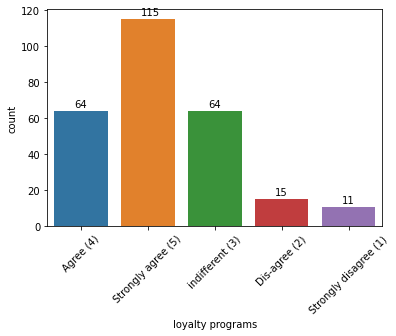

In [53]:
print("Fig 17")
s=sns.countplot(data["loyalty programs"])
for p in s.patches:
    s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")
s.set_xticklabels(s.get_xticklabels(),rotation=45);

**Observation**
- 42% of customer strongly believe that loayal programs is benefical for online shopping

### Is Good Website or Application lead to User satisfaction?

In [54]:
print("\n********Count of User satisfaction***********")
print(data["User satisfaction"].value_counts())
print("\n*******% of User satisfaction*************")
print(data["User satisfaction"].value_counts(normalize=True))


********Count of User satisfaction***********
Strongly agree (5)    175
Agree (4)              86
Dis-agree (2)           8
Name: User satisfaction, dtype: int64

*******% of User satisfaction*************
Strongly agree (5)    0.650558
Agree (4)             0.319703
Dis-agree (2)         0.029740
Name: User satisfaction, dtype: float64


### Univariate Analysis

Fig 18


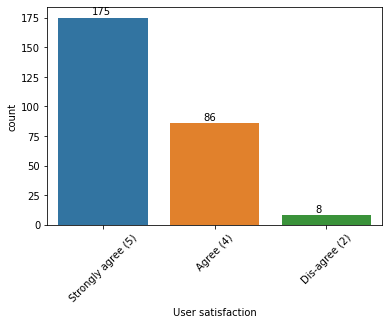

In [55]:
print("Fig 18")
s=sns.countplot(data["User satisfaction"])
for p in s.patches:
    s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")
s.set_xticklabels(s.get_xticklabels(),rotation=45);

**Observation**
- Around 65% of user strongly believe that good website or application provide user satisfaction.

### Is Net benefit important factor of shopping online?

In [56]:
print("\n********Count of Net Benefit***********")
print(data["Net benefit"].value_counts())
print("\n*******% of Net benefit*************")
print(data["Net benefit"].value_counts(normalize=True))


********Count of Net Benefit***********
Strongly agree (5)    164
Agree (4)              54
indifferent (3)        40
Dis-agree (2)          11
Name: Net benefit, dtype: int64

*******% of Net benefit*************
Strongly agree (5)    0.609665
Agree (4)             0.200743
indifferent (3)       0.148699
Dis-agree (2)         0.040892
Name: Net benefit, dtype: float64


### Univartiate Analysis

Fig 19


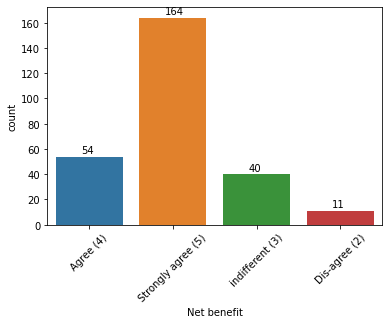

In [57]:
print("Fig 19")
s=sns.countplot(data["Net benefit"])
for p in s.patches:
    s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")
s.set_xticklabels(s.get_xticklabels(),rotation=45);

**Observation**
- 61% of user believe that net benefit lead to uesr satisfaction for making purchase.

### Is wide Product Assortment is play important role for online shopper?

In [58]:
print("\n********Count of Product Assortment***********")
print(data["Product assortment"].value_counts())
print("\n*******% of Product Assortment*************")
print(data["Product assortment"].value_counts(normalize=True))


********Count of Product Assortment***********
Strongly agree (5)    111
Agree (4)              94
indifferent (3)        57
Dis-agree (2)           7
Name: Product assortment, dtype: int64

*******% of Product Assortment*************
Strongly agree (5)    0.412639
Agree (4)             0.349442
indifferent (3)       0.211896
Dis-agree (2)         0.026022
Name: Product assortment, dtype: float64


### Univariate Analysis

Fig 20


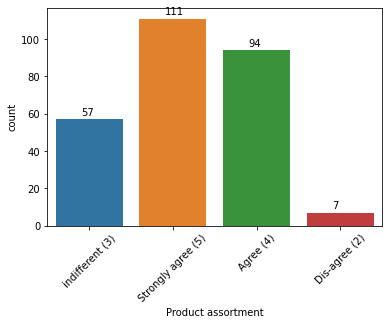

In [59]:
print("Fig 20")
s=sns.countplot(data["Product assortment"])
for p in s.patches:
    s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")
s.set_xticklabels(s.get_xticklabels(),rotation=45);

**Observation**
- 71% user believe that online retailer provide wide varity of product assortment and benefit.

### Is Online shopper provide better Discount?

In [60]:
print("\n********Count of Discount***********")
print(data["Discount"].value_counts())
print("\n*******% of Discount*************")
print(data["Discount"].value_counts(normalize=True))


********Count of Discount***********
Strongly agree (5)    148
Agree (4)              75
Disagree (2)           31
indifferent (3)        15
Name: Discount, dtype: int64

*******% of Discount*************
Strongly agree (5)    0.550186
Agree (4)             0.278810
Disagree (2)          0.115242
indifferent (3)       0.055762
Name: Discount, dtype: float64


### Univariate Analysis

Fig 21


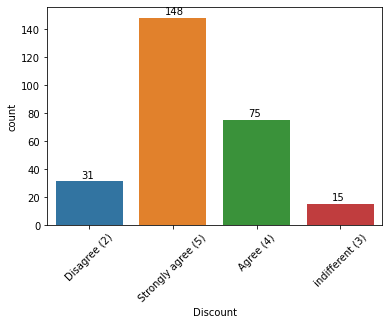

In [61]:
print("Fig 21")
s=sns.countplot(data["Discount"])
for p in s.patches:
    s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")
s.set_xticklabels(s.get_xticklabels(),rotation=45);

**Observation**
- 55% of user strongly agree that online provide tham better discount.

### Is online shopping enhance the  Social status of customer?

In [62]:
print("\n********Count of Social status***********")
print(data["Social status"].value_counts())
print("\n*******% of Social status*************")
print(data["Social status"].value_counts(normalize=True))


********Count of Social status***********
indifferent (3)          100
Agree (4)                 59
Strongly agree (5)        48
Strongly disagree (1)     33
Dis-agree (2)             29
Name: Social status, dtype: int64

*******% of Social status*************
indifferent (3)          0.371747
Agree (4)                0.219331
Strongly agree (5)       0.178439
Strongly disagree (1)    0.122677
Dis-agree (2)            0.107807
Name: Social status, dtype: float64


### Univariate Analysis

Fig 22


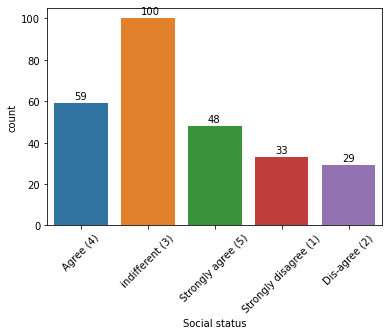

In [63]:
print("Fig 22")
s=sns.countplot(data["Social status"])
for p in s.patches:
    s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")
s.set_xticklabels(s.get_xticklabels(),rotation=45);

**Observation**
- 37 % of user believe that by doing online shopping from preferred retailer enhance their social status.

### Is Customer feel Gratification while shopping online?

In [64]:
print("\n********Count of gratification***********")
print(data["gratification"].value_counts())
print("\n*******% of gratification*************")
print(data["gratification"].value_counts(normalize=True))


********Count of gratification***********
indifferent (3)          101
Strongly agree (5)        65
Agree (4)                 63
Disagree (2)              22
Strongly disagree (1)     18
Name: gratification, dtype: int64

*******% of gratification*************
indifferent (3)          0.375465
Strongly agree (5)       0.241636
Agree (4)                0.234201
Disagree (2)             0.081784
Strongly disagree (1)    0.066914
Name: gratification, dtype: float64


### Univariate Analysis

Fig 23


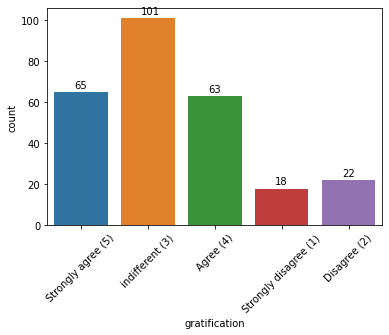

In [65]:
print("Fig 23")
s=sns.countplot(data["gratification"])
for p in s.patches:
    s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")
s.set_xticklabels(s.get_xticklabels(),rotation=45);

**Observation**
- 37% of user feels that it provide gratification when doing shopping online from preferred e-retailer.

### Is online shopping helps user to fulfill certain roles?

In [66]:
print("\n********Count of roles***********")
print(data["roles"].value_counts())
print("\n*******% of roles*************")
print(data["roles"].value_counts(normalize=True))


********Count of roles***********
Agree (4)                88
indifferent (3)          88
Strongly agree (5)       38
Strongly disagree (1)    33
Dis-agree (2)            22
Name: roles, dtype: int64

*******% of roles*************
Agree (4)                0.327138
indifferent (3)          0.327138
Strongly agree (5)       0.141264
Strongly disagree (1)    0.122677
Dis-agree (2)            0.081784
Name: roles, dtype: float64


### Univariate Analysis

Fig 24


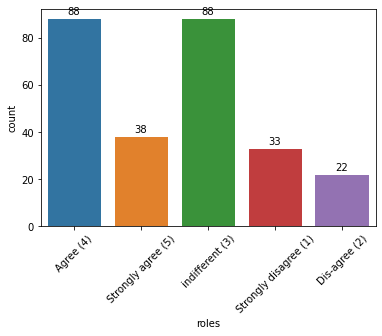

In [67]:
print("Fig 24")
s=sns.countplot(data["roles"])
for p in s.patches:
    s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")
s.set_xticklabels(s.get_xticklabels(),rotation=45);

**Observation**
- only 32 % of user feel that online shopping helps them to fulfil certain roles.

### Is Online Shopping provides value for money?

In [68]:
print("\n********Count of Value for money***********")
print(data["Value for money"].value_counts())
print("\n*******% of Value for money*************")
print(data["Value for money"].value_counts(normalize=True))


********Count of Value for money***********
Agree (4)             149
Strongly agree (5)     82
indifferent (3)        38
Name: Value for money, dtype: int64

*******% of Value for money*************
Agree (4)             0.553903
Strongly agree (5)    0.304833
indifferent (3)       0.141264
Name: Value for money, dtype: float64


### Univariate Analysis

Fig 25


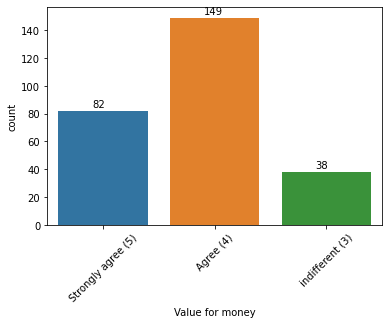

In [69]:
print("Fig 25")
s=sns.countplot(data["Value for money"])
for p in s.patches:
    s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")
s.set_xticklabels(s.get_xticklabels(),rotation=45);

**Observation**
- 55% of user they feel that online shopping provide value for money to them.

### which retailer having more Visual appealing?

In [70]:
print("\n********Count of Visual appealing***********")
print(data["Visual appealing"].value_counts())
print("\n*******% of Visual appealing*************")
print(data["Visual appealing"].value_counts(normalize=True))


********Count of Visual appealing***********
Amazon.in, Flipkart.com                                         87
Amazon.in                                                       44
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    36
Amazon.in, Paytm.com, Myntra.com                                20
Myntra.com                                                      15
Amazon.in, Myntra.com                                           15
Flipkart.com, Myntra.com                                        15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Flipkart.com                                                    12
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                11
Name: Visual appealing, dtype: int64

*******% of Visual appealing*************
Amazon.in, Flipkart.com                                         0.323420
Amazon.in                                                       0.163569
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.c

In [71]:
visual=data["Visual appealing"].value_counts()

In [72]:
Amazon=0
Flipkart=0
Paytm=0
Snapdeal=0
Myntra=0
for col in (data["Visual appealing"]):
        if "Amazon" in col:
            Amazon +=1
        if "Flipkart" in col:
            Flipkart +=1
        if "Paytm" in col:
            Paytm +=1
        if "Snapdeal" in col:
            Snapdeal +=1
        if "Myntra" in col:
            Myntra +=1
    
Data={"Amazon.in":Amazon,
     "Flipkart.in":Flipkart,
     "Paytm.in":Paytm,
     "Snapdeal.in":Snapdeal,
     "Myntra.in":Myntra
     }
visual_appealing=pd.DataFrame(Data,index=["Visual appealing"])
print(visual_appealing)


                  Amazon.in  Flipkart.in  Paytm.in  Snapdeal.in  Myntra.in
Visual appealing        227          175        67           61        115


### Univariate Analysis

Fig 26


<AxesSubplot:ylabel='Visual Appealing'>

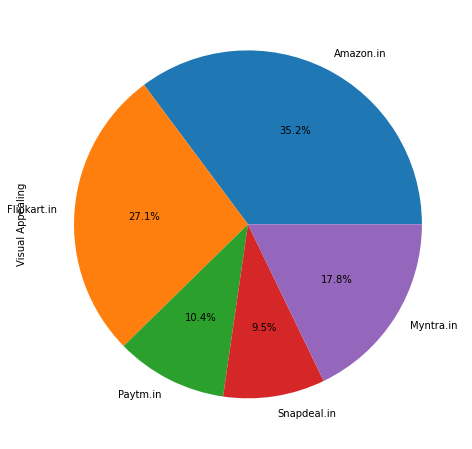

In [73]:
print("Fig 26")
visual_appealing.sum().plot(kind="pie",ylabel="Visual Appealing",figsize=(10,8),autopct="%1.1f%%")

**Observation**
- 32% of user feels that Amazon and flipkart visual appealing is good.

### Which Online Retailer having takes less Delivery time?

In [74]:
print("\n********Count of Delivery time***********")
print(data["Delivery time"].value_counts())
print("\n*******% of Delivery time*************")
print(data["Delivery time"].value_counts(normalize=True))


********Count of Delivery time***********
Amazon.in                                 107
Amazon.in, Flipkart.com                    82
Amazon.in, Flipkart.com, Snapdeal.com      36
Flipkart.com                               15
Amazon.in, Flipkart.com, Myntra.com        15
Flipkart.com, Myntra.com, Snapdeal.com     14
Name: Delivery time, dtype: int64

*******% of Delivery time*************
Amazon.in                                 0.397770
Amazon.in, Flipkart.com                   0.304833
Amazon.in, Flipkart.com, Snapdeal.com     0.133829
Flipkart.com                              0.055762
Amazon.in, Flipkart.com, Myntra.com       0.055762
Flipkart.com, Myntra.com, Snapdeal.com    0.052045
Name: Delivery time, dtype: float64


In [75]:
Amazon=0
Flipkart=0
Paytm=0
Snapdeal=0
Myntra=0
for col in (data["Delivery time"]):
        if "Amazon" in col:
            Amazon +=1
        if "Flipkart" in col:
            Flipkart +=1
        if "Paytm" in col:
            Paytm +=1
        if "Snapdeal" in col:
            Snapdeal +=1
        if "Myntra" in col:
            Myntra +=1
    
Data={"Amazon.in":Amazon,
     "Flipkart.in":Flipkart,
     "Paytm.in":Paytm,
     "Snapdeal.in":Snapdeal,
     "Myntra.in":Myntra
     }
Delivery_time=pd.DataFrame(Data,index=["Delivery time"])
print(Delivery_time)


               Amazon.in  Flipkart.in  Paytm.in  Snapdeal.in  Myntra.in
Delivery time        240          162         0           50         29


### Univariate Analysis

Fig 27


<AxesSubplot:ylabel='Delivery_time'>

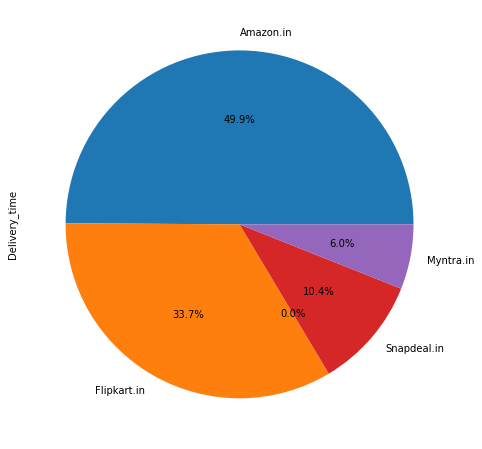

In [76]:
print("Fig 27")
Delivery_time.sum().plot(kind="pie",ylabel="Delivery_time",figsize=(10,8),autopct="%1.1f%%")

**Observation**
- 49.9 % of user feels that delivery time is less in Amazon.

### Which E-ratailer customer trust on Privacy information

In [77]:
print("\n********Count of Privacy information***********")
print(data["Privacy information"].value_counts())
print("\n*******% of Privacy information*************")
print(data["Privacy information"].value_counts(normalize=True))


********Count of Privacy information***********
Amazon.in                                                       71
Amazon.in, Flipkart.com                                         54
Amazon.in, Flipkart.com, Myntra.com                             25
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    24
Paytm.com                                                       18
Myntra.com                                                      15
Flipkart.com                                                    15
Amazon.in, Paytm.com                                            15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Amazon.in, Flipkart.com, Paytm.com                              11
Amazon.in, Flipkart.com, Snapdeal.com                            7
Name: Privacy information, dtype: int64

*******% of Privacy information*************
Amazon.in                                                       0.263941
Amazon.in, Flipkart.com                                

In [78]:
Amazon=0
Flipkart=0
Paytm=0
Snapdeal=0
Myntra=0
for col in (data["Privacy information"]):
        if "Amazon" in col:
            Amazon +=1
        if "Flipkart" in col:
            Flipkart +=1
        if "Paytm" in col:
            Paytm +=1
        if "Snapdeal" in col:
            Snapdeal +=1
        if "Myntra" in col:
            Myntra +=1
    
Data={"Amazon.in":Amazon,
     "Flipkart.in":Flipkart,
     "Paytm.in":Paytm,
     "Snapdeal.in":Snapdeal,
     "Myntra.in":Myntra
     }
Privacy_information=pd.DataFrame(Data,index=["Privacy information"])
print(Privacy_information)


                     Amazon.in  Flipkart.in  Paytm.in  Snapdeal.in  Myntra.in
Privacy information        221          150        68           45         78


### Univariate Analysis

Fig 28


<AxesSubplot:ylabel='Privacy_information'>

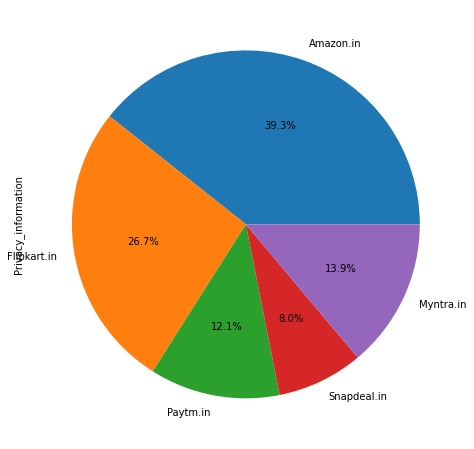

In [79]:
print("Fig 28")
Privacy_information.sum().plot(kind="pie",ylabel="Privacy_information",figsize=(10,8),autopct="%1.1f%%")

**Observation**
- 39.3% of user believe that Amazon having better privacy of customer information.

### Which E-Retailer Customer feel better approach of  Online assistance through different channel?

In [80]:
print("\n********Count of Presence online***********")
print(data["Presence online"].value_counts())
print("\n*******% of Presence online*************")
print(data["Presence online"].value_counts(normalize=True))


********Count of Presence online***********
Amazon.in, Flipkart.com, Myntra.com, Snapdeal    61
Amazon.in                                        60
Amazon.in, Flipkart.com                          39
Amazon.in, Snapdeal                              26
Myntra.com                                       20
Amazon.in, Flipkart.com, Myntra.com              15
Amazon.in, Myntra.com                            15
Amazon.in, Flipkart.com, Paytm.com               13
Paytm.com                                        12
Flipkart.com                                      8
Name: Presence online, dtype: int64

*******% of Presence online*************
Amazon.in, Flipkart.com, Myntra.com, Snapdeal    0.226766
Amazon.in                                        0.223048
Amazon.in, Flipkart.com                          0.144981
Amazon.in, Snapdeal                              0.096654
Myntra.com                                       0.074349
Amazon.in, Flipkart.com, Myntra.com              0.055762
Amazon.in

In [81]:
Amazon=0
Flipkart=0
Paytm=0
Snapdeal=0
Myntra=0
for col in (data["Presence online"]):
        if "Amazon" in col:
            Amazon +=1
        if "Flipkart" in col:
            Flipkart +=1
        if "Paytm" in col:
            Paytm +=1
        if "Snapdeal" in col:
            Snapdeal +=1
        if "Myntra" in col:
            Myntra +=1
    
Data={"Amazon.in":Amazon,
     "Flipkart.in":Flipkart,
     "Paytm.in":Paytm,
     "Snapdeal.in":Snapdeal,
     "Myntra.in":Myntra
     }
Presence_online=pd.DataFrame(Data,index=["Presence online"])
print(Presence_online)


                 Amazon.in  Flipkart.in  Paytm.in  Snapdeal.in  Myntra.in
Presence online        229          136        25           87        111


### Univariate Analysis

Fig 29


<AxesSubplot:ylabel='Presence_online'>

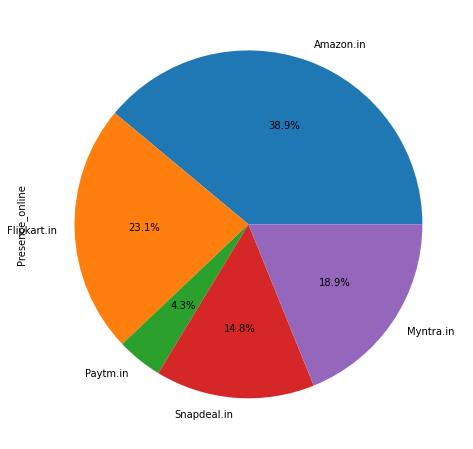

In [82]:
print("Fig 29")
Presence_online.sum().plot(kind="pie",ylabel="Presence_online",figsize=(10,8),autopct="%1.1f%%")

**Observation**
- But alone 38.9% of user feel that presence of online is good in Amazon.

### Which E-Retailer Customer feels better Security transaction?

In [83]:
print("\n********Count of Security transaction***********")
print(data["Security transaction"].value_counts())
print("\n*******% of Security transaction*************")
print(data["Security transaction"].value_counts(normalize=True))


********Count of Security transaction***********
Amazon.in                                                       51
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    42
Flipkart.com                                                    33
Amazon.in, Flipkart.com, Snapdeal.com                           25
Amazon.in, Flipkart.com                                         24
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in, Snapdeal.com                                         19
Myntra.com                                                      15
Paytm.com                                                       15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Amazon.in, Flipkart.com, Paytm.com                              11
Name: Security transaction, dtype: int64

*******% of Security transaction*************
Amazon.in                                                       0.189591
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snap

In [84]:
Amazon=0
Flipkart=0
Paytm=0
Snapdeal=0
Myntra=0
for col in (data["Security transaction"]):
        if "Amazon" in col:
            Amazon +=1
        if "Flipkart" in col:
            Flipkart +=1
        if "Paytm" in col:
            Paytm +=1
        if "Snapdeal" in col:
            Snapdeal +=1
        if "Myntra" in col:
            Myntra +=1
    
Data={"Amazon.in":Amazon,
     "Flipkart.in":Flipkart,
     "Paytm.in":Paytm,
     "Snapdeal.in":Snapdeal,
     "Myntra.in":Myntra
     }
Security_transaction=pd.DataFrame(Data,index=["Security transaction"])
print(Security_transaction)


                      Amazon.in  Flipkart.in  Paytm.in  Snapdeal.in  Myntra.in
Security transaction        206          149        88          100         91


### Univariate Analysis

Fig 30


<AxesSubplot:ylabel='Security transaction'>

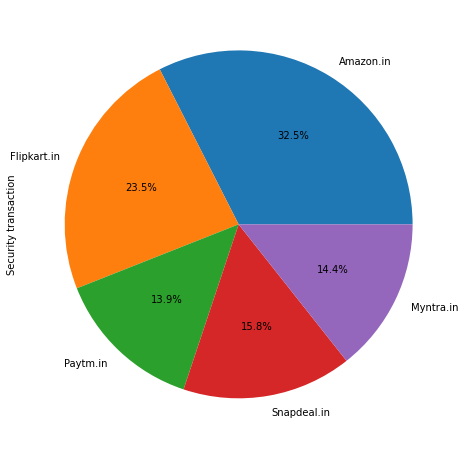

In [85]:
print("Fig 30")
Security_transaction.sum().plot(kind="pie",ylabel="Security transaction",figsize=(10,8),autopct="%1.1f%%")

**Observation**
- 32.5% user feel that security transaction is good in Amazon compare to other players.

### Which Online Retailer Customer preceived more trustworthiness?

In [86]:
print("\n********Count of Perceived trust***********")
print(data["Perceived trust"].value_counts())
print("\n*******% of Perceived trust*************")
print(data["Perceived trust"].value_counts(normalize=True))


********Count of Perceived trust***********
Amazon.in                                                       76
Amazon.in, Flipkart.com, Snapdeal.com                           36
Amazon.in, Myntra.com                                           35
Amazon.in, Flipkart.com                                         31
Flipkart.com                                                    27
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               25
Myntra.com                                                      15
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    13
Amazon.in, Flipkart.com, Paytm.com                              11
Name: Perceived trust, dtype: int64

*******% of Perceived trust*************
Amazon.in                                                       0.282528
Amazon.in, Flipkart.com, Snapdeal.com                           0.133829
Amazon.in, Myntra.com                                           0.130112
Amazon.in, Flipkart.com                                

In [87]:
Amazon=0
Flipkart=0
Paytm=0
Snapdeal=0
Myntra=0
for col in (data["Perceived trust"]):
        if "Amazon" in col:
            Amazon +=1
        if "Flipkart" in col:
            Flipkart +=1
        if "Paytm" in col:
            Paytm +=1
        if "Snapdeal" in col:
            Snapdeal +=1
        if "Myntra" in col:
            Myntra +=1
    
Data={"Amazon.in":Amazon,
     "Flipkart.in":Flipkart,
     "Paytm.in":Paytm,
     "Snapdeal.in":Snapdeal,
     "Myntra.in":Myntra
     }
Perceived_trust=pd.DataFrame(Data,index=["Perceived trust"])
print(Perceived_trust)


                 Amazon.in  Flipkart.in  Paytm.in  Snapdeal.in  Myntra.in
Perceived trust        227          143        24           74         88


### Univariate Analysis

Fig 31


<AxesSubplot:ylabel='Perceived trust'>

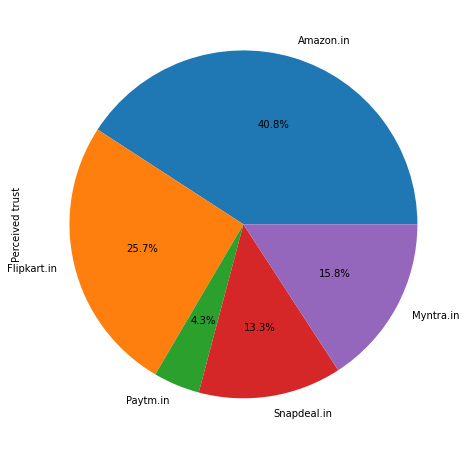

In [88]:
print("Fig 31")
Perceived_trust.sum().plot(kind="pie",ylabel="Perceived trust",figsize=(10,8),autopct="%1.1f%%")

**Observation**
- 40.8% of user perceived Amazon as trustworthness.

## Which Online retailer takes less logged in time during sales or promotional period?

In [89]:
print("\n********Count of logged in time***********")
print(data["logged in time"].value_counts())
print("\n*******% of logged in time*************")
print(data["logged in time"].value_counts(normalize=True))


********Count of logged in time***********
Amazon.in                                57
Amazon.in, Flipkart.com                  38
Paytm.com                                38
Myntra.com                               35
Amazon.in, Flipkart.com, Snapdeal.com    29
Snapdeal.com                             25
Flipkart.com, Paytm.com                  15
Flipkart.com, Paytm.com, Snapdeal.com    13
Amazon.in, Paytm.com                     11
Flipkart.com                              8
Name: logged in time, dtype: int64

*******% of logged in time*************
Amazon.in                                0.211896
Amazon.in, Flipkart.com                  0.141264
Paytm.com                                0.141264
Myntra.com                               0.130112
Amazon.in, Flipkart.com, Snapdeal.com    0.107807
Snapdeal.com                             0.092937
Flipkart.com, Paytm.com                  0.055762
Flipkart.com, Paytm.com, Snapdeal.com    0.048327
Amazon.in, Paytm.com                    

In [90]:
Amazon=0
Flipkart=0
Paytm=0
Snapdeal=0
Myntra=0
for col in (data["logged in time"]):
        if "Amazon" in col:
            Amazon +=1
        if "Flipkart" in col:
            Flipkart +=1
        if "Paytm" in col:
            Paytm +=1
        if "Snapdeal" in col:
            Snapdeal +=1
        if "Myntra" in col:
            Myntra +=1
    
Data={"Amazon.in":Amazon,
     "Flipkart.in":Flipkart,
     "Paytm.in":Paytm,
     "Snapdeal.in":Snapdeal,
     "Myntra.in":Myntra
     }
logged_in_time=pd.DataFrame(Data,index=["logged in time"])
print(logged_in_time)


                Amazon.in  Flipkart.in  Paytm.in  Snapdeal.in  Myntra.in
logged in time        135          103        77           67         35


### Univariate Analysis

Fig 32


<AxesSubplot:ylabel='logged in time'>

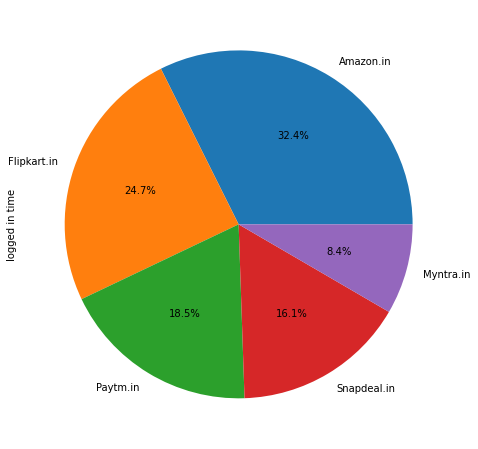

In [91]:
print("Fig 32")
logged_in_time.sum().plot(kind="pie",ylabel="logged in time",figsize=(10,8),autopct="%1.1f%%")

**Observation**
- 32.4% of user believe that amazon logged in time is better than other.

### Which online retailer having good graphis diaplay time?

In [92]:
print("\n********Count of graphis diaplay time***********")
print(data["graphis diaplay time"].value_counts())
print("\n*******% of graphis diaplay time*************")
print(data["graphis diaplay time"].value_counts(normalize=True))


********Count of graphis diaplay time***********
Amazon.in, Flipkart.com                60
Amazon.in                              39
Myntra.com                             35
Snapdeal.com                           34
Myntra.com, Snapdeal.com               25
Flipkart.com, Snapdeal.com             19
Flipkart.com                           15
Paytm.com                              15
Amazon.in, Myntra.com, Snapdeal.com    14
Amazon.in, Paytm.com                   13
Name: graphis diaplay time, dtype: int64

*******% of graphis diaplay time*************
Amazon.in, Flipkart.com                0.223048
Amazon.in                              0.144981
Myntra.com                             0.130112
Snapdeal.com                           0.126394
Myntra.com, Snapdeal.com               0.092937
Flipkart.com, Snapdeal.com             0.070632
Flipkart.com                           0.055762
Paytm.com                              0.055762
Amazon.in, Myntra.com, Snapdeal.com    0.052045
Amazon.in,

In [93]:
Amazon=0
Flipkart=0
Paytm=0
Snapdeal=0
Myntra=0
for col in (data["graphis diaplay time"]):
        if "Amazon" in col:
            Amazon +=1
        if "Flipkart" in col:
            Flipkart +=1
        if "Paytm" in col:
            Paytm +=1
        if "Snapdeal" in col:
            Snapdeal +=1
        if "Myntra" in col:
            Myntra +=1
    
Data={"Amazon.in":Amazon,
     "Flipkart.in":Flipkart,
     "Paytm.in":Paytm,
     "Snapdeal.in":Snapdeal,
     "Myntra.in":Myntra
     }
graphis_diaplay_time=pd.DataFrame(Data,index=["graphis diaplay time"])
print(graphis_diaplay_time)


                      Amazon.in  Flipkart.in  Paytm.in  Snapdeal.in  Myntra.in
graphis diaplay time        126           94        28           92         74


### Univariate Analysis

Fig 33


<AxesSubplot:ylabel='graphis diaplay time'>

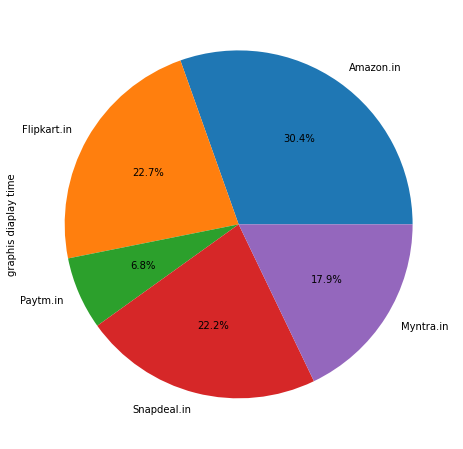

In [94]:
print("Fig 33")
graphis_diaplay_time.sum().plot(kind="pie",ylabel="graphis diaplay time",figsize=(10,8),autopct="%1.1f%%")

**Observation**
- 30.4% of user believe that Graphis display time is better in amazon and flipkart

### Which Online retailer having issue of Late declaration price during promotional or sale period?

In [95]:
print("\n********Count of Late declaration price***********")
print(data["Late declaration price"].value_counts())
print("\n*******% of Late declaration price*************")
print(data["Late declaration price"].value_counts(normalize=True))


********Count of Late declaration price***********
Myntra.com                 75
Paytm.com                  52
snapdeal.com               41
Flipkart.com               38
Amazon.in                  38
Amazon.in, Paytm.com       13
Paytm.com, snapdeal.com     7
Amazon.in, Flipkart.com     5
Name: Late declaration price, dtype: int64

*******% of Late declaration price*************
Myntra.com                 0.278810
Paytm.com                  0.193309
snapdeal.com               0.152416
Flipkart.com               0.141264
Amazon.in                  0.141264
Amazon.in, Paytm.com       0.048327
Paytm.com, snapdeal.com    0.026022
Amazon.in, Flipkart.com    0.018587
Name: Late declaration price, dtype: float64


In [96]:
Amazon=0
Flipkart=0
Paytm=0
Snapdeal=0
Myntra=0
for col in (data["Late declaration price"]):
        if "Amazon" in col:
            Amazon +=1
        if "Flipkart" in col:
            Flipkart +=1
        if "Paytm" in col:
            Paytm +=1
        if "Snapdeal" in col:
            Snapdeal +=1
        if "Myntra" in col:
            Myntra +=1
    
Data={"Amazon.in":Amazon,
     "Flipkart.in":Flipkart,
     "Paytm.in":Paytm,
     "Snapdeal.in":Snapdeal,
     "Myntra.in":Myntra
     }
Late_declaration_price=pd.DataFrame(Data,index=["Late declaration price"])
print(Late_declaration_price)


                        Amazon.in  Flipkart.in  Paytm.in  Snapdeal.in  \
Late declaration price         56           43        72            0   

                        Myntra.in  
Late declaration price         75  


### Univariate Analysis

Fig 34


<AxesSubplot:ylabel='Late declaration price'>

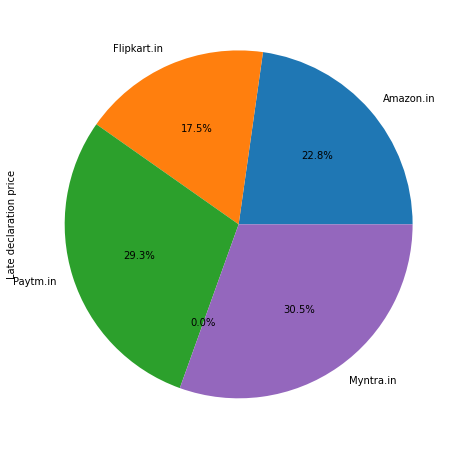

In [97]:
print("Fig 34")
Late_declaration_price.sum().plot(kind="pie",ylabel="Late declaration price",figsize=(10,8),autopct="%1.1f%%")

**Observation**
- 30.5% of user feels that in Myntra they declared price late.

### Which Online retailer takes more time for Landing page?

In [98]:
print("\n********Count of Landing page time***********")
print(data["Landing page time"].value_counts())
print("\n*******% of Landing page time*************")
print(data["Landing page time"].value_counts(normalize=True))


********Count of Landing page time***********
Myntra.com                          61
Paytm.com                           59
Flipkart.com                        32
Snapdeal.com                        23
Amazon.in, Flipkart.com             18
Amazon.in                           16
Paytm.com, Snapdeal.com             15
Amazon.in, Snapdeal.com             14
Amazon.in, Paytm.com                13
Flipkart.com, Snapdeal.com          11
Amazon.in, Paytm.com, Myntra.com     7
Name: Landing page time, dtype: int64

*******% of Landing page time*************
Myntra.com                          0.226766
Paytm.com                           0.219331
Flipkart.com                        0.118959
Snapdeal.com                        0.085502
Amazon.in, Flipkart.com             0.066914
Amazon.in                           0.059480
Paytm.com, Snapdeal.com             0.055762
Amazon.in, Snapdeal.com             0.052045
Amazon.in, Paytm.com                0.048327
Flipkart.com, Snapdeal.com          0

In [99]:
Amazon=0
Flipkart=0
Paytm=0
Snapdeal=0
Myntra=0
for col in (data["Landing page time"]):
        if "Amazon" in col:
            Amazon +=1
        if "Flipkart" in col:
            Flipkart +=1
        if "Paytm" in col:
            Paytm +=1
        if "Snapdeal" in col:
            Snapdeal +=1
        if "Myntra" in col:
            Myntra +=1
    
Data={"Amazon.in":Amazon,
     "Flipkart.in":Flipkart,
     "Paytm.in":Paytm,
     "Snapdeal.in":Snapdeal,
     "Myntra.in":Myntra
     }
Landing_page_time=pd.DataFrame(Data,index=["Landing page time"])
print(Landing_page_time)


                   Amazon.in  Flipkart.in  Paytm.in  Snapdeal.in  Myntra.in
Landing page time         68           61        94           63         68


### Univariate Analysis

Fig 35


<AxesSubplot:ylabel='Landing page time'>

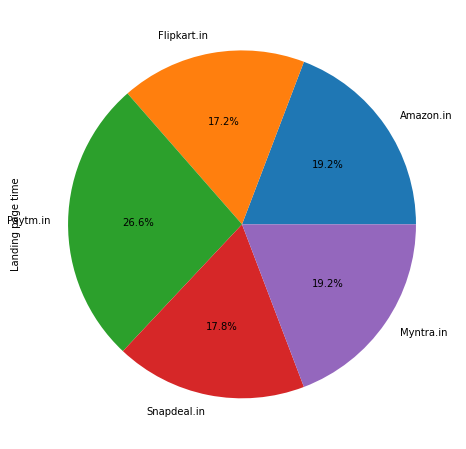

In [100]:
print("Fig 35")
Landing_page_time.sum().plot(kind="pie",ylabel="Landing page time",figsize=(10,8),autopct="%1.1f%%")

**Observation**
- During sale period 26.6% of user feels that Paytm takes more time in Landing page.

### Which online retailer having very limited mode of payment option?

In [101]:
print("\n********Count of Limited mode of payment***********")
print(data["Limited mode of payment"].value_counts())
print("\n*******% of Limited mode of payment*************")
print(data["Limited mode of payment"].value_counts(normalize=True))


********Count of Limited mode of payment***********
Snapdeal.com                87
Amazon.in                   62
Flipkart.com                31
Amazon.in, Flipkart.com     29
Paytm.com                   25
Paytm.com, Snapdeal.com     15
Amazon.in, Paytm.com        13
Myntra.com, Snapdeal.com     7
Name: Limited mode of payment, dtype: int64

*******% of Limited mode of payment*************
Snapdeal.com                0.323420
Amazon.in                   0.230483
Flipkart.com                0.115242
Amazon.in, Flipkart.com     0.107807
Paytm.com                   0.092937
Paytm.com, Snapdeal.com     0.055762
Amazon.in, Paytm.com        0.048327
Myntra.com, Snapdeal.com    0.026022
Name: Limited mode of payment, dtype: float64


In [102]:
Amazon=0
Flipkart=0
Paytm=0
Snapdeal=0
Myntra=0
for col in (data["Limited mode of payment"]):
        if "Amazon" in col:
            Amazon +=1
        if "Flipkart" in col:
            Flipkart +=1
        if "Paytm" in col:
            Paytm +=1
        if "Snapdeal" in col:
            Snapdeal +=1
        if "Myntra" in col:
            Myntra +=1
    
Data={"Amazon.in":Amazon,
     "Flipkart.in":Flipkart,
     "Paytm.in":Paytm,
     "Snapdeal.in":Snapdeal,
     "Myntra.in":Myntra
     }
Limited_mode_of_payment=pd.DataFrame(Data,index=["Limited mode of payment"])
print(Limited_mode_of_payment)


                         Amazon.in  Flipkart.in  Paytm.in  Snapdeal.in  \
Limited mode of payment        104           60        53          109   

                         Myntra.in  
Limited mode of payment          7  


### Univariate Analysis

Fig 36


<AxesSubplot:ylabel='Limited mode of payment'>

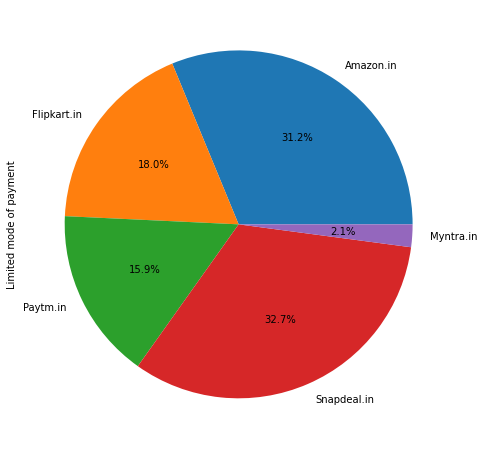

In [103]:
print("Fig 36")
Limited_mode_of_payment.sum().plot(kind="pie",ylabel="Limited mode of payment",figsize=(10,8),autopct="%1.1f%%")

**Observation**
- 32.7% of user feels that Snapdeal they have very limited mode of payment

### Which Online partner having more Delivery Period?

In [104]:
print("\n********Count of Delivery Period***********")
print(data["Delivery period"].value_counts())
print("\n*******% of Delivery Period*************")
print(data["Delivery period"].value_counts(normalize=True))


********Count of Delivery Period***********
Paytm.com                  72
Snapdeal.com               64
Flipkart.com               44
Amazon.in                  37
Paytm.com, Snapdeal.com    26
Myntra.com                 26
Name: Delivery period, dtype: int64

*******% of Delivery Period*************
Paytm.com                  0.267658
Snapdeal.com               0.237918
Flipkart.com               0.163569
Amazon.in                  0.137546
Paytm.com, Snapdeal.com    0.096654
Myntra.com                 0.096654
Name: Delivery period, dtype: float64


In [105]:
Amazon=0
Flipkart=0
Paytm=0
Snapdeal=0
Myntra=0
for col in (data["Delivery period"]):
        if "Amazon" in col:
            Amazon +=1
        if "Flipkart" in col:
            Flipkart +=1
        if "Paytm" in col:
            Paytm +=1
        if "Snapdeal" in col:
            Snapdeal +=1
        if "Myntra" in col:
            Myntra +=1
    
Data={"Amazon.in":Amazon,
     "Flipkart.in":Flipkart,
     "Paytm.in":Paytm,
     "Snapdeal.in":Snapdeal,
     "Myntra.in":Myntra
     }
Delivery_period=pd.DataFrame(Data,index=["Delivery period"])
print(Delivery_period)


                 Amazon.in  Flipkart.in  Paytm.in  Snapdeal.in  Myntra.in
Delivery period         37           44        98           90         26


### Univariate Analysis

Fig 37


<AxesSubplot:ylabel='Delivery period'>

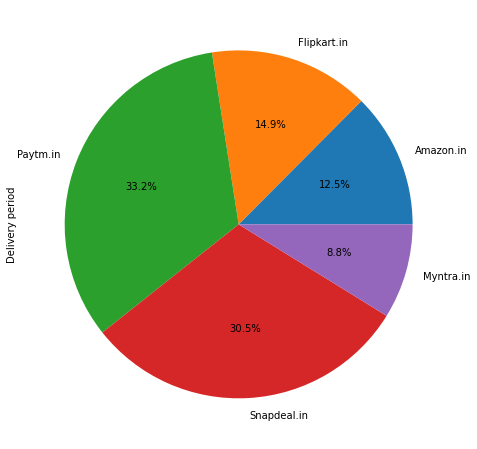

In [106]:
print("Fig 37")
Delivery_period.sum().plot(kind="pie",ylabel="Delivery period",figsize=(10,8),autopct="%1.1f%%")

**Observation**
- 33.2% of user feels that paytm take more delivery timing than other players.

### Which online retailer renovate their website frequently?

In [107]:
print("\n********Count of Website renovation***********")
print(data["Website renovation"].value_counts())
print("\n*******% of Website renovation*************")
print(data["Website renovation"].value_counts(normalize=True))


********Count of Website renovation***********
Amazon.in                   96
Paytm.com                   63
Amazon.in, Flipkart.com     45
Myntra.com                  30
Flipkart.com                20
Snapdeal.com                 8
Flipkart.com, Myntra.com     7
Name: Website renovation, dtype: int64

*******% of Website renovation*************
Amazon.in                   0.356877
Paytm.com                   0.234201
Amazon.in, Flipkart.com     0.167286
Myntra.com                  0.111524
Flipkart.com                0.074349
Snapdeal.com                0.029740
Flipkart.com, Myntra.com    0.026022
Name: Website renovation, dtype: float64


In [108]:
Amazon=0
Flipkart=0
Paytm=0
Snapdeal=0
Myntra=0
for col in (data["Website renovation"]):
        if "Amazon" in col:
            Amazon +=1
        if "Flipkart" in col:
            Flipkart +=1
        if "Paytm" in col:
            Paytm +=1
        if "Snapdeal" in col:
            Snapdeal +=1
        if "Myntra" in col:
            Myntra +=1
    
Data={"Amazon.in":Amazon,
     "Flipkart.in":Flipkart,
     "Paytm.in":Paytm,
     "Snapdeal.in":Snapdeal,
     "Myntra.in":Myntra
     }
Website_renovation=pd.DataFrame(Data,index=["Website renovation"])
print(Website_renovation)


                    Amazon.in  Flipkart.in  Paytm.in  Snapdeal.in  Myntra.in
Website renovation        141           72        63            8         37


### Univariate Analysis

Fig 38


<AxesSubplot:ylabel='Website renovation'>

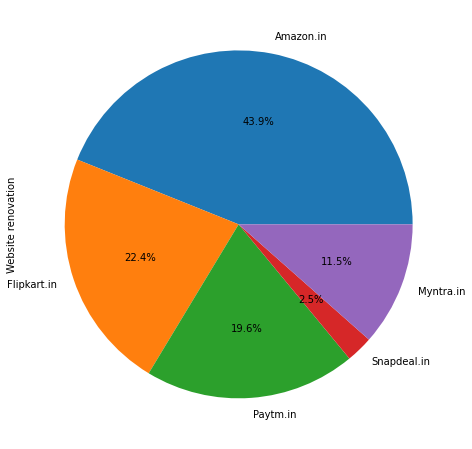

In [109]:
print("Fig 38")
Website_renovation.sum().plot(kind="pie",ylabel="Website renovation",figsize=(10,8),autopct="%1.1f%%")

**Observation**
- 43.9% of user feels that Amazon they change in website and application design more.

### Which online partner apps  having issue while navigate from one page to another page?

In [110]:
print("\n********Count of Disruption***********")
print(data["Disruption"].value_counts())
print("\n*******% of Disruption*************")
print(data["Disruption"].value_counts(normalize=True))


********Count of Disruption***********
Amazon.in                     53
Myntra.com                    52
Snapdeal.com                  49
Paytm.com                     39
Flipkart.com                  26
Amazon.in, Flipkart.com       25
Myntra.com, Snapdeal.com      14
Flipkart.com, Snapdeal.com    11
Name: Disruption, dtype: int64

*******% of Disruption*************
Amazon.in                     0.197026
Myntra.com                    0.193309
Snapdeal.com                  0.182156
Paytm.com                     0.144981
Flipkart.com                  0.096654
Amazon.in, Flipkart.com       0.092937
Myntra.com, Snapdeal.com      0.052045
Flipkart.com, Snapdeal.com    0.040892
Name: Disruption, dtype: float64


In [111]:
Amazon=0
Flipkart=0
Paytm=0
Snapdeal=0
Myntra=0
for col in (data["Disruption"]):
        if "Amazon" in col:
            Amazon +=1
        if "Flipkart" in col:
            Flipkart +=1
        if "Paytm" in col:
            Paytm +=1
        if "Snapdeal" in col:
            Snapdeal +=1
        if "Myntra" in col:
            Myntra +=1
    
Data={"Amazon.in":Amazon,
     "Flipkart.in":Flipkart,
     "Paytm.in":Paytm,
     "Snapdeal.in":Snapdeal,
     "Myntra.in":Myntra
     }
Disruption=pd.DataFrame(Data,index=["Disruption"])
print(Disruption)


            Amazon.in  Flipkart.in  Paytm.in  Snapdeal.in  Myntra.in
Disruption         78           62        39           74         66


### Univariate Analysis

Fig 39


<AxesSubplot:ylabel='Disruption'>

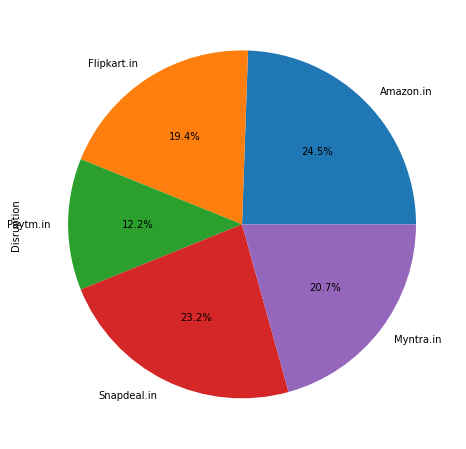

In [112]:
print("Fig 39")
Disruption.sum().plot(kind="pie",ylabel="Disruption",figsize=(10,8),autopct="%1.1f%%")

**Observation**
- 24.5% of user feels disturb while moving from one page to another page on Amazon and Myntra

### Which Online partner apps or website feels better experiance after renovation?

In [113]:
print("\n********Count of After renovation experiance***********")
print(data["After renovation experiance"].value_counts())
print("\n*******% of After renovation experiance*************")
print(data["After renovation experiance"].value_counts(normalize=True))


********Count of After renovation experiance***********
Amazon.in                             94
Flipkart.com                          47
Amazon.in, Flipkart.com               45
Amazon.in, Flipkart.com, Paytm.com    25
Amazon.in, Paytm.com                  18
Paytm.com                             15
Myntra.com, Snapdeal.com              14
Snapdeal.com                          11
Name: After renovation experiance, dtype: int64

*******% of After renovation experiance*************
Amazon.in                             0.349442
Flipkart.com                          0.174721
Amazon.in, Flipkart.com               0.167286
Amazon.in, Flipkart.com, Paytm.com    0.092937
Amazon.in, Paytm.com                  0.066914
Paytm.com                             0.055762
Myntra.com, Snapdeal.com              0.052045
Snapdeal.com                          0.040892
Name: After renovation experiance, dtype: float64


In [114]:
Amazon=0
Flipkart=0
Paytm=0
Snapdeal=0
Myntra=0
for col in (data["After renovation experiance"]):
        if "Amazon" in col:
            Amazon +=1
        if "Flipkart" in col:
            Flipkart +=1
        if "Paytm" in col:
            Paytm +=1
        if "Snapdeal" in col:
            Snapdeal +=1
        if "Myntra" in col:
            Myntra +=1
    
Data={"Amazon.in":Amazon,
     "Flipkart.in":Flipkart,
     "Paytm.in":Paytm,
     "Snapdeal.in":Snapdeal,
     "Myntra.in":Myntra
     }
After_renovation_experiance=pd.DataFrame(Data,index=["After renovation experiance"])
print(After_renovation_experiance)


                             Amazon.in  Flipkart.in  Paytm.in  Snapdeal.in  \
After renovation experiance        182          117        58           25   

                             Myntra.in  
After renovation experiance         14  


### Univariate Analysis

Fig 40


<AxesSubplot:ylabel='After renovation experiance'>

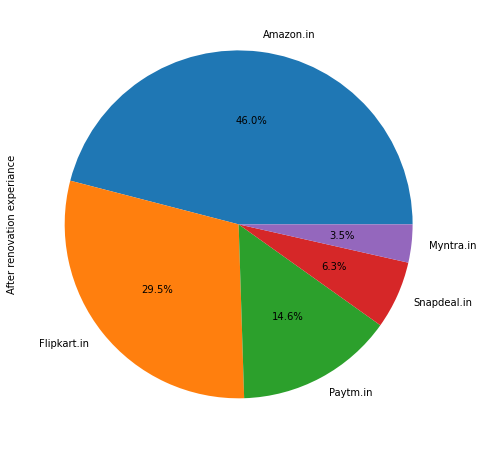

In [115]:
print("Fig 40")
After_renovation_experiance.sum().plot(kind="pie",ylabel="After renovation experiance",figsize=(10,8),autopct="%1.1f%%")

**Observation**
- 46% of user feels that after renovation experiance is good in Amazon

### Which online retailer customer recommend for shopping?

In [116]:
print("\n********Count of Recommend online retailer***********")
print(data["Recommend online retailer"].value_counts())
print("\n*******% of Recommend online retailer*************")
print(data["Recommend online retailer"].value_counts(normalize=True))


********Count of Recommend online retailer***********
Amazon.in                                            79
Amazon.in, Flipkart.com                              62
Flipkart.com                                         39
Amazon.in, Myntra.com                                30
Amazon.in, Paytm.com, Myntra.com                     20
Amazon.in, Flipkart.com, Myntra.com                  15
Amazon.in, Paytm.com                                 13
Flipkart.com, Paytm.com, Myntra.com, snapdeal.com    11
Name: Recommend online retailer, dtype: int64

*******% of Recommend online retailer*************
Amazon.in                                            0.293680
Amazon.in, Flipkart.com                              0.230483
Flipkart.com                                         0.144981
Amazon.in, Myntra.com                                0.111524
Amazon.in, Paytm.com, Myntra.com                     0.074349
Amazon.in, Flipkart.com, Myntra.com                  0.055762
Amazon.in, Paytm.com       

In [117]:
Amazon=0
Flipkart=0
Paytm=0
Snapdeal=0
Myntra=0
for col in (data["Recommend online retailer"]):
        if "Amazon" in col:
            Amazon +=1
        if "Flipkart" in col:
            Flipkart +=1
        if "Paytm" in col:
            Paytm +=1
        if "Snapdeal" in col:
            Snapdeal +=1
        if "Myntra" in col:
            Myntra +=1
    
Data={"Amazon.in":Amazon,
     "Flipkart.in":Flipkart,
     "Paytm.in":Paytm,
     "Snapdeal.in":Snapdeal,
     "Myntra.in":Myntra
     }
Recommend_online_retailer=pd.DataFrame(Data,index=["Recommend online retailer"])
print(Recommend_online_retailer)


                           Amazon.in  Flipkart.in  Paytm.in  Snapdeal.in  \
Recommend online retailer        219          127        44            0   

                           Myntra.in  
Recommend online retailer         76  


### Univariate Analysis

Fig 41


<AxesSubplot:ylabel='Recommend online retailer'>

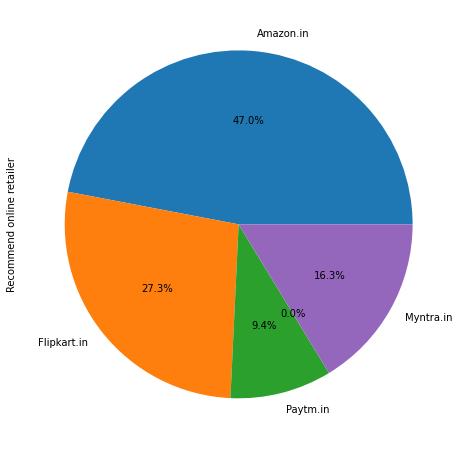

In [118]:
print("Fig 41")
Recommend_online_retailer.sum().plot(kind="pie",ylabel="Recommend online retailer",figsize=(10,8),autopct="%1.1f%%")

**Observation**
- 47% of user feels to recommend Amazon to other.
- 27.3% of user feels to recommend Flipkart to other.

## Which Online Retailer customer are shopping most?

In [119]:
print("\n********Count of Online Retailer shopped***********")
print(data["Online retailer shopped"].value_counts())
print("\n*******% of Online Retailer shopped*************")
print(data["Online retailer shopped"].value_counts(normalize=True))


********Count of Online Retailer shopped***********
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    82
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               44
Amazon.in, Flipkart.com                                         32
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                29
Amazon.in, Flipkart.com, Snapdeal.com                           27
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in                                                       16
Amazon.in, Paytm.com                                            12
Amazon.in, Flipkart.com, Paytm.com                               7
Name: Online retailer shopped, dtype: int64

*******% of Online Retailer shopped*************
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    0.304833
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               0.163569
Amazon.in, Flipkart.com                                         0.118959
Amazon.in, Flipkart.com, Paytm.

In [120]:
Amazon=0
Flipkart=0
Paytm=0
Snapdeal=0
Myntra=0
for col in (data["Online retailer shopped"]):
        if "Amazon" in col:
            Amazon +=1
        if "Flipkart" in col:
            Flipkart +=1
        if "Paytm" in col:
            Paytm +=1
        if "Snapdeal" in col:
            Snapdeal +=1
        if "Myntra" in col:
            Myntra +=1
    
Data={"Amazon.in":Amazon,
     "Flipkart.in":Flipkart,
     "Paytm.in":Paytm,
     "Snapdeal.in":Snapdeal,
     "Myntra.in":Myntra
     }
Online_retailer_shopped=pd.DataFrame(Data,index=["Online retailer shopped"])
print(Online_retailer_shopped)


                         Amazon.in  Flipkart.in  Paytm.in  Snapdeal.in  \
Online retailer shopped        269          221       150          182   

                         Myntra.in  
Online retailer shopped        146  


### Univariate Analysis

Fig 42


<AxesSubplot:ylabel='Online retailer shopped'>

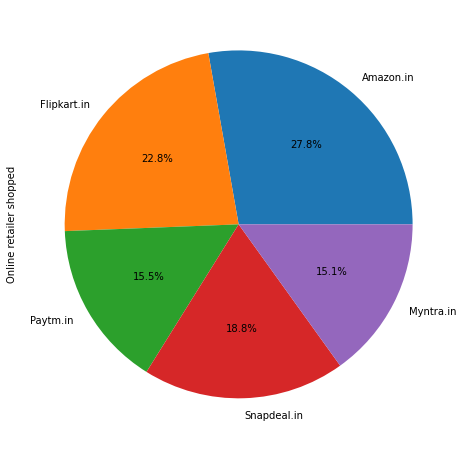

In [121]:
print("Fig 42")
Online_retailer_shopped.sum().plot(kind="pie",ylabel="Online retailer shopped",figsize=(10,8),autopct="%1.1f%%")

In [122]:
E_retailer=pd.concat([visual_appealing,Delivery_time,Privacy_information,Security_transaction,Privacy_information,Perceived_trust,logged_in_time,graphis_diaplay_time,Landing_page_time,Late_declaration_price,Limited_mode_of_payment,Delivery_period,Website_renovation,Disruption,After_renovation_experiance,Recommend_online_retailer,Online_retailer_shopped])

In [123]:
E_retailer

,Amazon.in,Flipkart.in,Paytm.in,Snapdeal.in,Myntra.in
Visual appealing,227,175,67,61,115
Delivery time,240,162,0,50,29
Privacy information,221,150,68,45,78
Security transaction,206,149,88,100,91
Privacy information,221,150,68,45,78
Perceived trust,227,143,24,74,88
logged in time,135,103,77,67,35
graphis diaplay time,126,94,28,92,74
Landing page time,68,61,94,63,68
Late declaration price,56,43,72,0,75


<AxesSubplot:>

<Figure size 2250x1500 with 0 Axes>

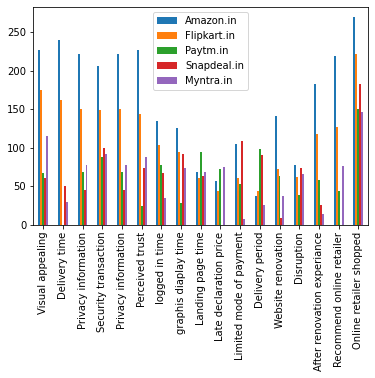

In [162]:
plt.figure(figsize=(15,10),dpi=150)
E_retailer.plot.bar()

## Which Age group of customer purchased frequency in one year?

In [125]:
pd.crosstab(data["Frequency purchased (in 1 yr)"],data["Age"])

Age,21-30 years,31-40 years,41-50 yaers,51 years and above,Less than 20 years
Frequency purchased (in 1 yr),,,,,
11-20 times,14,11,4,0,0
21-30 times,0,10,0,0,0
31-40 times,17,19,23,4,0
41 times and above,23,13,8,3,0
42 times and above,0,0,3,0,3
Less than 10 times,25,28,32,12,17


Fig 42


<AxesSubplot:xlabel='Age', ylabel='Frequency purchased (in 1 yr)'>

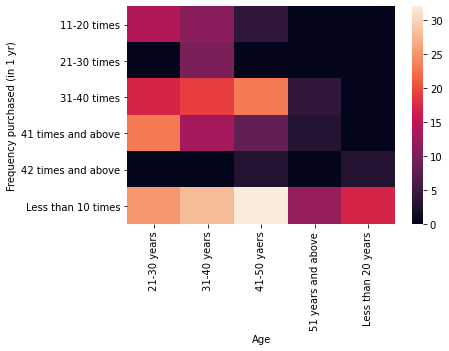

In [126]:
print("Fig 42")
sns.heatmap(pd.crosstab(data["Frequency purchased (in 1 yr)"],data["Age"]))

**Observation**
- We can analyse that 21 to 50 yrs of age group customer provide less than 10 time order online in a year.
- In Age group between 21-30 yrs of customer provide online order more than 41 times in a year.

## Which type of OS being used in Age Group?

In [127]:
pd.crosstab(data["OS"],data["Age"])

Age,21-30 years,31-40 years,41-50 yaers,51 years and above,Less than 20 years
OS,,,,,
Android,27,19,24,4,11
IOS/Mac,25,13,14,5,5
Window/windows Mobile,27,49,32,10,4


Fig 43


<AxesSubplot:xlabel='Age', ylabel='OS'>

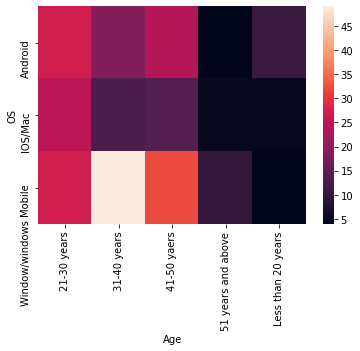

In [128]:
print("Fig 43")
sns.heatmap(pd.crosstab(data["OS"],data["Age"]))

**Observation**
- We can see that IOS/MAC operating system use by 21-30yrs of age group customer.
- from 31 yrs to 40 yrs of age group customer using windows operating system for onine purchase

## which type of paymemt preferred by different Age Group?

In [129]:
pd.crosstab(data["Preferred payment type"],data["Age"])

Age,21-30 years,31-40 years,41-50 yaers,51 years and above,Less than 20 years
Preferred payment type,,,,,
Cash on delivery (CoD),21,23,13,7,12
Credit/Debit cards,50,38,43,12,5
"E-wallets (Paytm, Freecharge etc.)",8,20,14,0,3


Fig 43


<AxesSubplot:xlabel='Age', ylabel='Preferred payment type'>

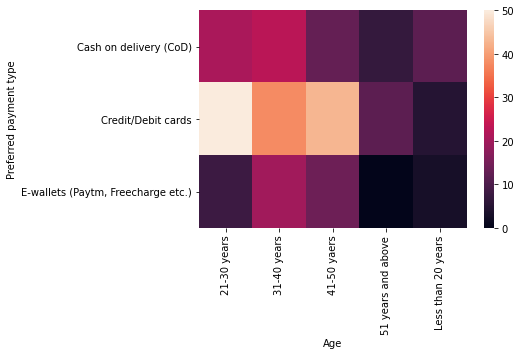

In [130]:
print("Fig 43")
sns.heatmap(pd.crosstab(data["Preferred payment type"],data["Age"]))

**Observation**
- From age group 21 to 50 yrs preferred payment type is credit/debit cards.

## What is the reason of Abandon cart in different Age group?

In [131]:
pd.crosstab(data["Reason abandon"],data["Age"])

Age,21-30 years,31-40 years,41-50 yaers,51 years and above,Less than 20 years
Reason abandon,,,,,
Better alternative offer,46,43,26,12,6
Change in price,8,12,14,3,0
Lack of trust,5,22,4,0,0
No preferred mode of payment,2,0,1,3,8
Promo code not applicable,18,4,25,1,6


Fig 44


<AxesSubplot:xlabel='Age', ylabel='Reason abandon'>

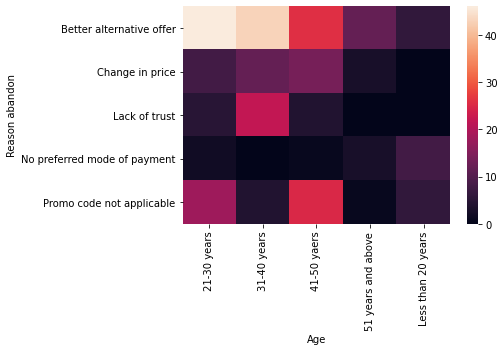

In [132]:
print("Fig 44")
sns.heatmap(pd.crosstab(data["Reason abandon"],data["Age"]))

**Observation**
- From Age group of 31-40 yrs of customer abandon rate is higher due to Lack of Trust.
- From 21 to 50 yrs of customer abandon rate is high due to better alternative offer.


## For 2nd time purchased which channel used by different Age of customer group.

In [133]:
pd.crosstab(data["Later Channed used"],data["Age"])

Age,21-30 years,31-40 years,41-50 yaers,51 years and above,Less than 20 years
Later Channed used,,,,,
Direct URL,24,9,18,11,8
E-mail,3,1,11,3,0
Search Engine,20,46,15,5,1
Social Media,5,0,3,0,0
Via application,27,25,23,0,11


Fig 45


<AxesSubplot:xlabel='Age', ylabel='Later Channed used'>

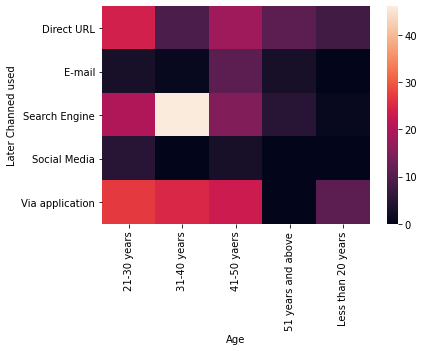

In [134]:
print("Fig 45")
sns.heatmap(pd.crosstab(data["Later Channed used"],data["Age"]))

**Observation**
- Age group 21-30 yrs of customer doing shopping through Direct URL,search Engine and Via application.
- Age group 31-40 yrs of customer doing shopping through search engine and via application.

# Hedonic Value Vs Utilitarian Value With PCA

**As mentioned in problem statement that combination of Hedonic Value and Utilitarian Value provide satisfaction to customer which lead to high retention rate.**

**Hedonic Value**

- gratification,roles,Social status,Adventure experiance,User satisfaction,Enjoyment.

**Utilitarian Value**

- Seller & product information,Monetary benifit and discount,Product assortment,Convenience,User friendly,Value for money,Discount and Return and replacement policy

In [135]:
data.columns

Index(['Gender', 'Age', 'City', 'Frequency purchased (in 1 yr)', 'OS',
       'Later Channed used', 'Browse time', 'Preferred payment type',
       'Reason abandon', 'Seller & product information', 'User friendly',
       'Transaction time', 'Customer query', 'Privacy data',
       'Monetary benifit and discount', 'Enjoyment',
       'Return and replacement policy', 'loyalty programs',
       'User satisfaction', 'Net benefit', 'Product assortment', 'Discount',
       'Convenience', 'Adventure experiance', 'Social status', 'gratification',
       'roles', 'Value for money', 'Easy use website', 'Wide variety',
       'Product Information', 'Loading speed', 'Reliability',
       'Qucikness complete purchase', 'Option Payment method',
       'Online retailer shopped', 'Visual appealing', 'Delivery time',
       'Privacy information', 'Presence online', 'Security transaction',
       'Perceived trust', 'logged in time', 'graphis diaplay time',
       'Late declaration price', 'Landing page

### Making list of feature for hedonicValue and utilitarian value

In [136]:
HedonicValue=["gratification","roles","Social status","Adventure experiance","User satisfaction","Enjoyment"]
UtilitarianValue=["Seller & product information","Monetary benifit and discount","Product assortment","Convenience","User friendly","Value for money","Discount","Return and replacement policy"]

## Checking Top feature for Hedonic Value

In [137]:
data_Hedonic=data[HedonicValue]

In [138]:
data_Hedonic.replace({"Strongly disagree (1)":"1","Dis-agree (2)":"2","Disagree (2)":"2","indifferent (3)":"3","Indifferent (3)":"3","Agree (4)":"4","Strongly agree (5)":"5"},inplace=True)

In [139]:
ColumnStats=pd.DataFrame(data_Hedonic.max(axis=0))
ColumnStats.columns=["MaxValues"]
ColumnStats["MinValues"]=data_Hedonic.min(axis=0)

uniqueCounts=pd.DataFrame(ColumnStats.index)
uniqueCounts.set_index(0,inplace=True)
uniqueCounts["UniqueValue"]=np.nan

for col in data_Hedonic:
    uniqueCounts.loc[col]["UniqueValue"]=data_Hedonic[col].nunique()
ColumnStats["UniqueValue"]=uniqueCounts["UniqueValue"]

## Checking Hedonic featues Statistic

In [140]:
ColumnStats

,MaxValues,MinValues,UniqueValue
gratification,5,1,5.0
roles,5,1,5.0
Social status,5,1,5.0
Adventure experiance,5,1,5.0
User satisfaction,5,2,3.0
Enjoyment,5,1,5.0


In [141]:
from sklearn.decomposition import PCA

In [142]:
covariance_mat=PCA(n_components=len(data_Hedonic.columns))
covariance_mat.fit(data_Hedonic)

PCA(n_components=6)

Fig 46


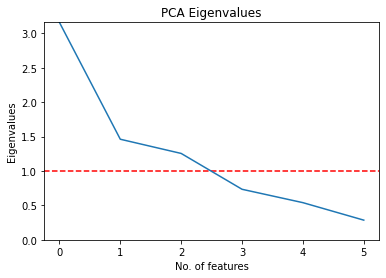

In [143]:
print("Fig 46")
plt.ylabel("Eigenvalues")
plt.xlabel("No. of features")
plt.title("PCA Eigenvalues")
plt.ylim(0,max(covariance_mat.explained_variance_))
plt.style.context("seaborn-whitegrid")
plt.axhline(y=1,color="r",linestyle="--")
plt.plot(covariance_mat.explained_variance_)
plt.show()

In [144]:
variance=covariance_mat.explained_variance_ratio_
var=np.cumsum(np.round(covariance_mat.explained_variance_ratio_,decimals=3)*100)

Fig 47


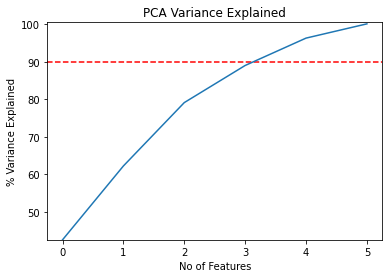

In [145]:
print("Fig 47")
plt.ylabel("% Variance Explained")
plt.xlabel("No of Features")
plt.title("PCA Variance Explained")
plt.ylim(min(var),100.5)
plt.style.context("seaborn-whitegrid")
plt.axhline(y=90,color="r",linestyle="--")
plt.plot(var)
plt.show()

In [146]:
components=pd.DataFrame(covariance_mat.components_,columns=data_Hedonic.columns)
components.rename(index=lambda x:"PC-"+str(x+1),inplace=True)

In [147]:
# Top  4 featurs contributors
pd.DataFrame(components.columns.values[np.argsort(-components.values, axis=1)[:,:4]],index=components.index,columns=["1st Feature","2nd Feature","3rd Feature","4th Feature"])


,1st Feature,2nd Feature,3rd Feature,4th Feature
PC-1,User satisfaction,Adventure experiance,Enjoyment,gratification
PC-2,Social status,roles,gratification,User satisfaction
PC-3,gratification,Enjoyment,User satisfaction,Social status
PC-4,roles,Enjoyment,Social status,Adventure experiance
PC-5,roles,gratification,User satisfaction,Adventure experiance
PC-6,gratification,Adventure experiance,Enjoyment,roles


**As we can see at PC-3 90% of variance explained , so we get top 3 Hedonic value features which are very important for customer retention.**
- User satisfaction
- Gratification
- Enjoyment
- Social Status

# Checking Top feature for Utilitarian Value

In [148]:
UtilitarianValue

['Seller & product information',
 'Monetary benifit and discount',
 'Product assortment',
 'Convenience',
 'User friendly',
 'Value for money',
 'Discount',
 'Return and replacement policy']

In [149]:
data_Utilitarian=data[UtilitarianValue]

In [150]:
data_Utilitarian.replace({"Strongly disagree (1)":"1","Dis-agree (2)":"2","Disagree (2)":"2","indifferent (3)":"3","Indifferent (3)":"3","Indifferent (3)":"3","Agree (4)":"4","Strongly agree (5)":"5"},inplace=True)

In [151]:
ColumnStats=pd.DataFrame(data_Utilitarian.max(axis=0))
ColumnStats.columns=["MaxValues"]
ColumnStats["MinValues"]=data_Utilitarian.min(axis=0)

uniqueCounts=pd.DataFrame(ColumnStats.index)
uniqueCounts.set_index(0,inplace=True)
uniqueCounts["UniqueValue"]=np.nan

for col in data_Utilitarian:
    uniqueCounts.loc[col]["UniqueValue"]=data_Utilitarian[col].nunique()
ColumnStats["UniqueValue"]=uniqueCounts["UniqueValue"]

# Checking Utilitarian featues Statistic

In [152]:
ColumnStats

,MaxValues,MinValues,UniqueValue
Seller & product information,5,1,5.0
Monetary benifit and discount,5,1,5.0
Product assortment,5,2,4.0
Convenience,5,3,3.0
User friendly,5,1,5.0
Value for money,5,3,3.0
Discount,5,2,4.0
Return and replacement policy,5,2,3.0


In [153]:
from sklearn.decomposition import PCA

In [154]:
data_Utilitarian

,Seller & product information,Monetary benifit and discount,Product assortment,Convenience,User friendly,Value for money,Discount,Return and replacement policy
0,3,3,3,3,2,5,2,2
1,5,5,5,3,5,5,5,5
2,4,5,5,4,5,4,5,5
3,3,4,4,4,5,4,5,4
4,3,5,4,4,5,5,5,5
...,...,...,...,...,...,...,...,...
264,4,3,4,3,4,3,2,2
265,5,5,5,5,5,5,5,5
266,4,4,3,4,4,4,4,5
267,5,5,5,4,5,3,4,4


In [155]:
covariance_mat=PCA(n_components=len(data_Utilitarian.columns))
covariance_mat.fit(data_Utilitarian)

PCA(n_components=8)

Fig 48


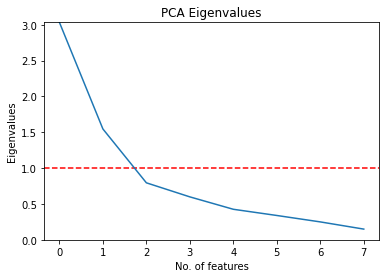

In [156]:
print("Fig 48")
plt.ylabel("Eigenvalues")
plt.xlabel("No. of features")
plt.title("PCA Eigenvalues")
plt.ylim(0,max(covariance_mat.explained_variance_))
plt.style.context("seaborn-whitegrid")
plt.axhline(y=1,color="r",linestyle="--")
plt.plot(covariance_mat.explained_variance_)
plt.show()

In [157]:
variance=covariance_mat.explained_variance_ratio_
var=np.cumsum(np.round(covariance_mat.explained_variance_ratio_,decimals=3)*100)

Fig 49


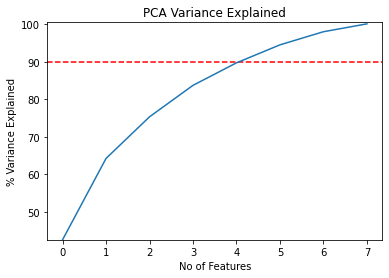

In [158]:
print("Fig 49")
plt.ylabel("% Variance Explained")
plt.xlabel("No of Features")
plt.title("PCA Variance Explained")
plt.ylim(min(var),100.5)
plt.style.context("seaborn-whitegrid")
plt.axhline(y=90,color="r",linestyle="--")
plt.plot(var)
plt.show()

In [159]:
components=pd.DataFrame(covariance_mat.components_,columns=data_Utilitarian.columns)
components.rename(index=lambda x:"PC-"+str(x+1),inplace=True)

In [160]:
# Top  5 featurs contributors
pd.DataFrame(components.columns.values[np.argsort(-components.values, axis=1)[:,:5]],index=components.index,columns=["1st Feature","2nd Feature","3rd Feature","4th Feature","5th Feature"])


,1st Feature,2nd Feature,3rd Feature,4th Feature,5th Feature
PC-1,Convenience,Value for money,Product assortment,Return and replacement policy,Discount
PC-2,Seller & product information,User friendly,Monetary benifit and discount,Value for money,Product assortment
PC-3,User friendly,Discount,Value for money,Return and replacement policy,Monetary benifit and discount
PC-4,Monetary benifit and discount,Value for money,Product assortment,Convenience,Discount
PC-5,Discount,Seller & product information,Value for money,Monetary benifit and discount,Convenience
PC-6,Discount,Product assortment,Seller & product information,User friendly,Monetary benifit and discount
PC-7,Convenience,Monetary benifit and discount,User friendly,Discount,Return and replacement policy
PC-8,Monetary benifit and discount,Return and replacement policy,Product assortment,Discount,Value for money


**As we can see at PC-4 90% of variance explained , so we get top 5 Hedonic value features which are very important for customer retention.**
- Monetary benifit and discount.
- Value for money
- Product Assortment
- Convenience
- Discount

# Conclusion

## Finding Key Point from Dataset for E-Retailer Company

- E-Retailer Company should target on Female Customer more than male if the product can use for unisex as shown in Fig 1.
- The Target Age group should be 31 yrs to 50 yrs for online shopping, within these group they need to find the best suited customer segment for their respective product.
- Almost 42% of user they are shopping online less than 10 times in a year as shown in Fig 4, So we need to convert those customer to increase the frequency of shopping with Customer retention strategy.
- As shown in fig 5, Almost 75% of online user they are using OS Windows/Windows mobile and Android for online shopping.
- As shown in fig 6, Almost 64% of online user using search engine and installed apps for online shopping in 2nd time purchase.
- As shown in fig 7, around 43% of customer spend 5 min to 16 min for online shopping.
- As shown in fig 8, Almost 55% of customer preferred to pay for online shopping by using credit/debit cards.
- As shown in fig 9, Around 49% of user Abandon the cart due to better alternative offer and 20% of user abandon the cart due to promo code not applicable.

## Finding Key factors for E-Retailer company.

**AMAZON.IN**
- STRENGTH

Visual appealing

Speedy Order Delivery time

Privacy of Information

Security transaction

Online Presence through different channel

Perveived trust

logged in time

Graphics display time

Website renovation

Experiance after website renovation

Most user recommend Amazon for online shopping

- WEAKNESS

Late declaration price(during promotion period)

Landing page time

Longer Delivery Period

Disturbtion while moving one page to another page











**FLIPKART**

- STRENGTH

Visual appealing

Delivery Time

Privacy of information

Security transaction

Presence online

Perceived Trust

logged in time

Website renovation

Late declaration price 

Less distrubtion while moving one to another page

- WEAKNESS

Graphics display time

Landing page time

Longer Deliver period









**Mynatra.in**

- STRENGTH

Late declaration price

Landing page time

Visual appealing


- WEAKNESS

Speedly delivery time

Logged in time

Limited payment mode

Longer delivery period

After renovation experiance



**PAYTM**

- STRENGTH

Late declaration price

Landing page time

logged in time

website renovation 

- WEAKNESS

Speedy delivery time

Presence online

Perceived trust

Graphics display time

Limited payment method



**SNAPDEAL**

- STRENGTH


Graphics display time

Less Distrubtion while moving one page to another

- WEAKNESS

Visual appealing

Privacy information

Speedy delivery time

Security transaction

Website renovation







# Strategy for Customer Retention for online shopper

- E-Retailer Company should target on Female Customer more than male if the product can use for unisex as shown in Fig 1.
- The Target Age group should be 31 yrs to 50 yrs for online shopping, within these group they need to find the best suited customer segment for their respective product.While doing marketing or promotion these age group should be targeted.
- Majority of Customer shopping less than 10 times in a year, so usually they can target their customer for monthly shopping by provide wide range of product with intention of increasing the basket value. 
- While lauching App or for advertisment they company should design by keeping in mind that its run well Windows/Windows mobile and Android Operatting system.Since majority of customer use these OS.
- Company should target in very well presence in search engine and also they should encorage customer to install their app in local device.
- Company should advertise their promotion in such as way that the message should be undestandable or deliver within 15 minutes to customer.
- For customer retention company must provide better experiance while customer paying by credit/debit cards, they can provide some promotion or offer for electronic card holder.
- Company should introduced more promo code and need to make sure these promo code reaches to target customer also the steps of redeemed those promo code.

**Overall while company making their strategy or marketing plan , theier objective must have covered below mentioned point for Repeat purchase by Customer:**

User satisfaction

Gratification

Enjoyment

Social Status

Monetary benifit and discount.

Value for money

Product Assortment

Convenience

Discount 